# **Welcome to The Rise of Skywalker's Data Analysis!**

**Installations**!

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Removes possible conflicating packages by uninstalling to-be-downloaded packages.
print("Removing packages...\n")
!pip uninstall -y numpy pandas scipy

#Installs new packages
print("Reinstalling packages...\n")
!pip install -q numpy==1.26.4 pandas==2.2.2 scipy==1.13.1

#Installs Topic Modeler
print("Installing topic modeler...\n")
!pip install -q gensim==4.3.3 nltk

print("Package Installation Complete!\n")
print("v" * 60)
print("\nPlease restart session under 'Runtime' above in your tool bar. Then move on to next cell.\n")
print("^" * 60)

Removing packages...

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: scipy 1.16.3
Uninstalling scipy-1.16.3:
  Successfully uninstalled scipy-1.16.3
Reinstalling packages...

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 100.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 121.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 13.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,

In [ ]:
print("Importing Libraries...\n")

#Imports the requested data analysis libraries from the packages. When we import "as" something we're giving it a nickname for use. Make sure to call it by this name.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter

#Display settings for better output. Whatever setting y'all want to customize it-TJ 11/10/25
pd.options.display.max_rows = 20
pd.options.display.max_columns = 10

#Imports gensim and gensim subsets.
import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.stem import WordNetLemmatizer

#Imports Natural Language Tookkit and silences it's comments in the output.
import nltk
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

print("\nLibrary Installation Complete!")

Importing Libraries...


Library Installation Complete!


In [ ]:
#Install Vader and Import Analyzer
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
#David on 11/12/2025


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.0 MB/s eta 0:00:00


In [ ]:
#Loads our 2 datasets and gives them names
#IMPORTANT
#ds1 = Youtube Comments
#ds2 = Rotten Tomatoes

print("Reading the CSVs")
ds1 = pd.read_csv("/content/drive/MyDrive/WRIT20833_Group_Project/rise_of_skywalker_final_trailer_5_6_year_comments.csv")
ds2 = pd.read_csv("/content/drive/MyDrive/WRIT20833_Group_Project/rottentomatoes_rise_of_skywalker.csv")

print("ds1 Examples!")
ds1.head()

Reading the CSVs
ds1 Examples!


,style-scope src,Link to Commentor Account,Commentor,Comment Date,yt-simple-endpoint href 2,Comment,Likes,Replies
0,https://yt3.ggpht.com/ytc/AIdro_n-T0bcHafA9qRo...,https://www.youtube.com/@patrickchurch2284,@patrickchurch2284,5 years ago,https://www.youtube.com/watch?v=8Qn_spdM5Zg&lc...,It’s a CRIME this music was not in the movie,12K,172 replies
1,https://yt3.ggpht.com/nXtN318NjK8Xn_oqT9JsuAo4...,https://www.youtube.com/@Shnibbs777,@Shnibbs777,5 years ago,https://www.youtube.com/watch?v=8Qn_spdM5Zg&lc...,Vader: How many pizzas should we order?\n\nPal...,21K,172 replies
2,https://yt3.ggpht.com/ytc/AIdro_mKXuQ8a1TJMHRG...,https://www.youtube.com/@niamhha9014,@niamhha9014,5 years ago,https://www.youtube.com/watch?v=8Qn_spdM5Zg&lc...,"""The end of a saga.""\n\nThere's some people wh...",11K,96 replies
3,https://yt3.ggpht.com/IZgXsAeaefAXYV-9NbRrwh-w...,https://www.youtube.com/@JohnnyCashFanatic,@JohnnyCashFanatic,6 years ago (edited),https://www.youtube.com/watch?v=8Qn_spdM5Zg&lc...,Keep your fingers crossed Palpatine says “Dew ...,30K,342 replies
4,https://yt3.ggpht.com/ytc/AIdro_mjlxjqiyWcSz8p...,https://www.youtube.com/@clarkm7645,@clarkm7645,6 years ago,https://www.youtube.com/watch?v=8Qn_spdM5Zg&lc...,Disney: “The saga will end”\n\nAlso Disney: “T...,12K,85 replies


In [ ]:
print("ds2 Examples!")
ds2.head()

ds2 Examples!


,review-data href,audience-reviews__name,audience-reviews__name href,audience-reviews__duration,weapons_reviews
0,https://www.rottentomatoes.com/profiles/A4XC0Y...,Bill J.,https://www.rottentomatoes.com/profiles/A4XC0Y...,"Oct 20, 2025","Boring, also ruined Palpatine in my opinion."
1,https://www.rottentomatoes.com/profiles/RMBFYj...,Luis Ángel S,https://www.rottentomatoes.com/profiles/RMBFYj...,"Oct 16, 2025",This film made an effort to rectify past issue...
2,https://www.rottentomatoes.com/profiles/RMQhmz...,Next C,https://www.rottentomatoes.com/profiles/RMQhmz...,"Oct 9, 2025",⭐️⭐️⭐️⭐️ (4/5)\n\nLoved it! The Rise of Skywal...
3,https://www.rottentomatoes.com/profiles/K1Oc43...,Bruce P,https://www.rottentomatoes.com/profiles/K1Oc43...,"Oct 9, 2025",Given the circumstances (Carrie Fisher's death...
4,https://www.rottentomatoes.com/profiles/jENUWw...,A Clanker N,https://www.rottentomatoes.com/profiles/jENUWw...,"Oct 3, 2025","Not Recommended at all, the whole film seems r..."


# **DS1 Analysis Code!**

In [ ]:
#MUST RUN BEFORE ANY DS1 ANALYSIS
df = ds1

In [ ]:
#Extracted from HW4-1
#Checkpoint 1: Verify your data loaded correctly
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

#Replace with our own 'TEXT_COLUMN' with actual text column name
text_column = 'Comment'  # Fill in your main text column name

print(f"Text column has {df[text_column].isna().sum()} missing values")
print(f"Sample text: {df[text_column].iloc[0][:200]}")

Dataset shape: (467, 8)
Columns: ['style-scope src', 'Link to Commentor Account', 'Commentor', 'Comment Date', 'yt-simple-endpoint href 2', 'Comment', 'Likes', 'Replies']
Text column has 4 missing values
Sample text: It’s a CRIME this music was not in the movie


In [ ]:
#Extracted from HW4-1
#Explore dataset structure
print("=== DATASET EXPLORATION ===")
print(f"Total entries: {len(df)}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nFirst few rows:")
df.head()

=== DATASET EXPLORATION ===
Total entries: 467

Data types:
style-scope src              object
Link to Commentor Account    object
Commentor                    object
Comment Date                 object
yt-simple-endpoint href 2    object
Comment                      object
Likes                        object
Replies                      object
dtype: object

First few rows:


,style-scope src,Link to Commentor Account,Commentor,Comment Date,yt-simple-endpoint href 2,Comment,Likes,Replies
0,https://yt3.ggpht.com/ytc/AIdro_n-T0bcHafA9qRo...,https://www.youtube.com/@patrickchurch2284,@patrickchurch2284,5 years ago,https://www.youtube.com/watch?v=8Qn_spdM5Zg&lc...,It’s a CRIME this music was not in the movie,12K,172 replies
1,https://yt3.ggpht.com/nXtN318NjK8Xn_oqT9JsuAo4...,https://www.youtube.com/@Shnibbs777,@Shnibbs777,5 years ago,https://www.youtube.com/watch?v=8Qn_spdM5Zg&lc...,Vader: How many pizzas should we order?\n\nPal...,21K,172 replies
2,https://yt3.ggpht.com/ytc/AIdro_mKXuQ8a1TJMHRG...,https://www.youtube.com/@niamhha9014,@niamhha9014,5 years ago,https://www.youtube.com/watch?v=8Qn_spdM5Zg&lc...,"""The end of a saga.""\n\nThere's some people wh...",11K,96 replies
3,https://yt3.ggpht.com/IZgXsAeaefAXYV-9NbRrwh-w...,https://www.youtube.com/@JohnnyCashFanatic,@JohnnyCashFanatic,6 years ago (edited),https://www.youtube.com/watch?v=8Qn_spdM5Zg&lc...,Keep your fingers crossed Palpatine says “Dew ...,30K,342 replies
4,https://yt3.ggpht.com/ytc/AIdro_mjlxjqiyWcSz8p...,https://www.youtube.com/@clarkm7645,@clarkm7645,6 years ago,https://www.youtube.com/watch?v=8Qn_spdM5Zg&lc...,Disney: “The saga will end”\n\nAlso Disney: “T...,12K,85 replies


In [ ]:
#Base template extracted from HW4-2
#Stopwords section added by TJ 11/7/25
stopwords = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers",
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is",
    "are", "was", "were", "be", "been", "being", "have", "has", "had", "having",
    "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or",
    "because", "as", "until", "while", "of", "at", "by", "for", "with", "about",
    "against", "between", "into", "through", "during", "before", "after", "above",
    "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under",
    "again", "further", "then", "once", "here", "there", "when", "where", "why",
    "how", "all", "both", "each", "few", "more", "most", "other", "some", "such",
    "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very",
    "s", "t", "can", "will", "just", "don", "should", "now", "ve", "ll", "amp",
    "also", "would", "could", "get", "go", "one", "two", "see", "time", "way",
    "may", "said", "say", "new", "first", "last", "long", "little", "much",
    "well", "still", "even", "back", "good", "many", "make", "made", "us", "really"
]

custom_stopwords = ["star", "wars", "story", "movie", "movies", "saga", "rise", "emperor", "rey"]  # Fill in words specific to our dataset

stopwords.extend(custom_stopwords)

print(f"Stopwords list loaded: {len(stopwords)} words to filter out")
print(f"Custom stopwords added: {custom_stopwords}")

Stopwords list loaded: 167 words to filter out
Custom stopwords added: ['star', 'wars', 'story', 'movie', 'movies', 'saga', 'rise', 'emperor', 'rey']


In [ ]:
#Extracted from HW4-1
#Text processing functions (First step approach to filtering)-TJ 11/10/25
def split_into_words(text):
    """Split text into words (same approach as HW1)"""
    if pd.isna(text):  # Handles missing text
        return []
    lowercase_text = str(text).lower()
    #This splits text into words by looking for places where letters/numbers are not present
    split_words = re.split("\\W+", lowercase_text)
    return [word for word in split_words if word]  #Removes empty strings

def clean_for_sentiment(text):
    """Clean text for sentiment analysis (keep punctuation!)"""
    if pd.isna(text):
        return ""
    # Keep punctuation and capitalization - VADER needs them!
    return str(text).strip()

print("Text processing functions ready")

Text processing functions ready


In [ ]:
#Template extraced from HW4-1
#Apply text cleaning to our dataset
#Replace 'text_column' with our actual column name

# Create cleaned text for sentiment analysis (keep punctuation)
df['clean_text_sentiment'] = df[text_column].apply(clean_for_sentiment)

# Create word lists for term frequency analysis (like HW1)
df['words'] = df[text_column].apply(split_into_words)
df['meaningful_words'] = df['words'].apply(lambda word_list: [word for word in word_list if word not in stopwords])

print("Text cleaning complete")
print(f"Sample cleaned text for sentiment: {df['clean_text_sentiment'].iloc[0][:100]}...")
print(f"Sample meaningful words: {df['meaningful_words'].iloc[0][:10]}")

#Added by TJ 11/10/25

Text cleaning complete
Sample cleaned text for sentiment: It’s a CRIME this music was not in the movie...
Sample meaningful words: ['crime', 'music']


In [ ]:
#Extraced from HW4-1
#Checkpoint 2: Check your cleaning worked
sample_text = df[text_column].iloc[0]
print(f"Original: {sample_text[:100]}")
print(f"For sentiment: {df['clean_text_sentiment'].iloc[0][:100]}")
print(f"Meaningful words: {df['meaningful_words'].iloc[0][:15]}")
# Should show: sentiment text keeps punctuation, meaningful words exclude stopwords

Original: It’s a CRIME this music was not in the movie
For sentiment: It’s a CRIME this music was not in the movie
Meaningful words: ['crime', 'music']


---

## Term Frequency Analysis

In [ ]:
#Extraced from HW4-1
#Combines all meaningful words from your dataset
all_meaningful_words = []
for word_list in df['meaningful_words']:
    all_meaningful_words.extend(word_list)

#Count word frequencies
word_frequency = Counter(all_meaningful_words)
top_words = word_frequency.most_common(20)  #Get top 20 words

print("TERM FREQUENCY ANALYSIS RESULTS")
print("=" * 40)
print(f"Total words analyzed: {len(all_meaningful_words):,}")
print(f"Unique words found: {len(word_frequency):,}")
print(f"\nTop 20 most frequent words:")

for i, (word, count) in enumerate(top_words, 1):
    print(f"{i:2d}. {word:<15} ({count:,} times)")

TERM FREQUENCY ANALYSIS RESULTS
Total words analyzed: 3,006
Unique words found: 692

Top 20 most frequent words:
 1. 2019            (207 times)
 2. ends            (168 times)
 3. 2020            (132 times)
 4. end             (65 times)
 5. disney          (57 times)
 6. jar             (38 times)
 7. palpatine       (35 times)
 8. comments        (25 times)
 9. darth           (23 times)
10. trailer         (23 times)
11. skywalker       (21 times)
12. look            (20 times)
13. senate          (19 times)
14. like            (18 times)
15. ever            (16 times)
16. gone            (16 times)
17. 2021            (16 times)
18. taking          (16 times)
19. friends         (16 times)
20. re              (16 times)


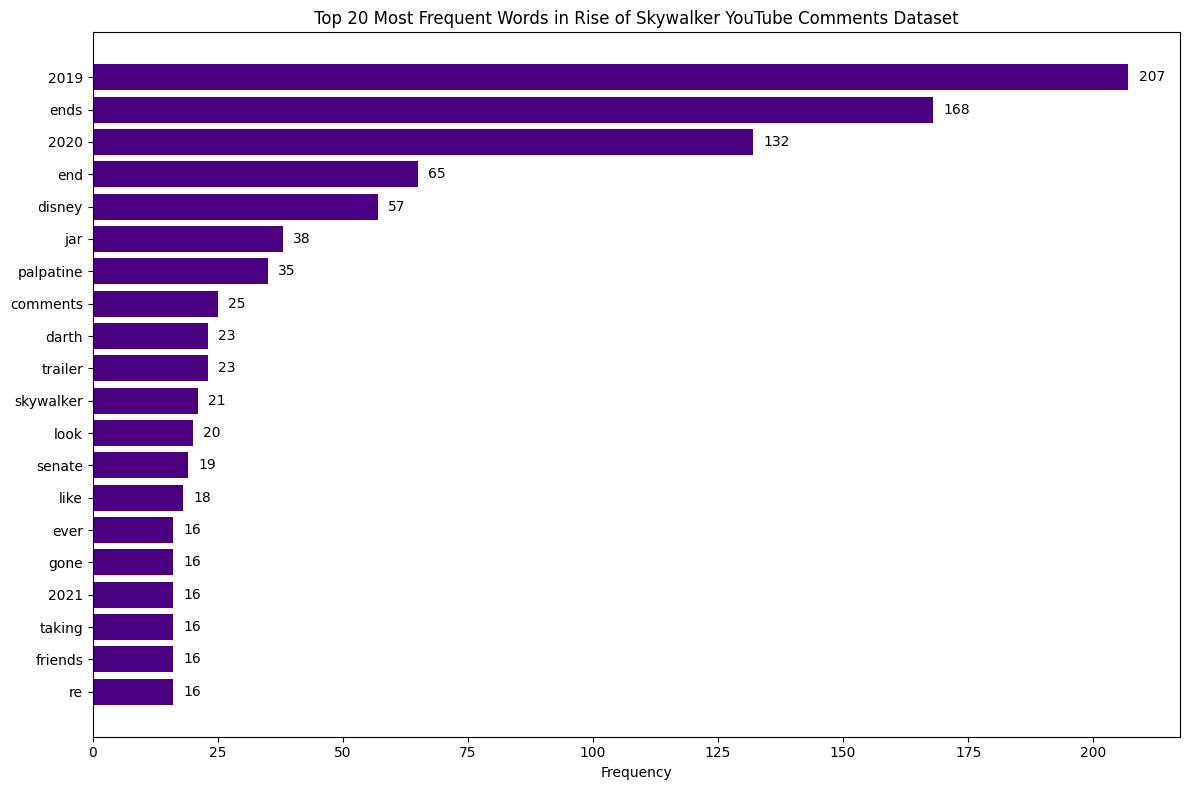

Term frequency visualization complete!


In [ ]:
#Extracted from HW4-1
#Create visualization of top words
words = [word for word, count in top_words]
counts = [count for word, count in top_words]

plt.figure(figsize=(12, 8))
plt.barh(range(len(words)), counts, color='indigo')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency')
plt.title(f'Top {len(words)} Most Frequent Words in Rise of Skywalker YouTube Comments Dataset')
plt.gca().invert_yaxis()  # Put highest frequency at top

# Add count labels on bars
for i, count in enumerate(counts):
    plt.text(count + max(counts)*0.01, i, str(count), va='center')

plt.tight_layout()
plt.show()

print("Term frequency visualization complete!")

---

## Sentiment Analysis with VADER

In [ ]:
#Extraced from HW4-1
#Install and import VADER
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

print("✅ VADER installed and ready for sentiment analysis!")

✅ VADER installed and ready for sentiment analysis!


In [ ]:
#Extracted from HW4-1
#Checkpoint 3: VADER setup
test_text = "This assignment is surprisingly interesting!"
test_result = analyzer.polarity_scores(test_text)
print(f"Test text: {test_text}")
print(f"VADER result: {test_result}")
# Should see: {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6588} (or similar)

Test text: This assignment is surprisingly interesting!
VADER result: {'neg': 0.0, 'neu': 0.366, 'pos': 0.634, 'compound': 0.636}


In [ ]:
#Extraced from HW4-1
#Apply sentiment analysis to your entire dataset
def get_sentiment_score(text):
    """Get compound sentiment score for a text"""
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Apply sentiment analysis to your entire dataset
df['sentiment_score'] = df['clean_text_sentiment'].apply(get_sentiment_score) # Fill in: what function?

print("✅ Sentiment analysis complete for entire dataset!")
print(f"\nSentiment score range: {df['sentiment_score'].min():.3f} to {df['sentiment_score'].max():.3f}")
print(f"Average sentiment: {df['sentiment_score'].mean():.3f}")

✅ Sentiment analysis complete for entire dataset!

Sentiment score range: -0.970 to 0.751
Average sentiment: -0.161


In [ ]:
#Extracted from HW4-1
#Analyze sentiment patterns in your data
print("🎭 SENTIMENT ANALYSIS SUMMARY")
print("=" * 35)

# Basic statistics
print(f"Total entries analyzed: {len(df)}")
print(f"Average sentiment: {df['sentiment_score'].mean():.3f}")
print(f"Most positive entry: {df['sentiment_score'].max():.3f}")
print(f"Most negative entry: {df['sentiment_score'].min():.3f}")
print(f"Standard deviation: {df['sentiment_score'].std():.3f}")

# Categorize sentiments
positive = len(df[df['sentiment_score'] > 0.1])
neutral = len(df[(df['sentiment_score'] >= -0.1) & (df['sentiment_score'] <= 0.1)])
negative = len(df[df['sentiment_score'] < -0.1])

print(f"\nSentiment distribution:")
print(f"Positive (>0.1): {positive} ({positive/len(df)*100:.1f}%)")
print(f"Neutral (-0.1 to 0.1): {neutral} ({neutral/len(df)*100:.1f}%)")
print(f"Negative (<-0.1): {negative} ({negative/len(df)*100:.1f}%)")

🎭 SENTIMENT ANALYSIS SUMMARY
Total entries analyzed: 467
Average sentiment: -0.161
Most positive entry: 0.751
Most negative entry: -0.970
Standard deviation: 0.407

Sentiment distribution:
Positive (>0.1): 89 (19.1%)
Neutral (-0.1 to 0.1): 166 (35.5%)
Negative (<-0.1): 212 (45.4%)


In [ ]:
#Extracted from HW4-1
#Find most positive and negative examples
most_positive = df.loc[df['sentiment_score'].idxmax()]
most_negative = df.loc[df['sentiment_score'].idxmin()]

print(f"📈 MOST POSITIVE ENTRY (score: {most_positive['sentiment_score']:.3f}):")
print(f"Text: {most_positive['clean_text_sentiment'][:200]}...")
print()
print(f"📉 MOST NEGATIVE ENTRY (score: {most_negative['sentiment_score']:.3f}):")
print(f"Text: {most_negative['clean_text_sentiment'][:200]}...")

📈 MOST POSITIVE ENTRY (score: 0.751):
Text: 1983: The Saga Ends
2005: The Saga Ends
2019: The Saga Ends

On to the next trilogy......

Update: I like how all of the comments are copying this one lmao...

📉 MOST NEGATIVE ENTRY (score: -0.970):
Text: Star Wars Saga:

· Invasion of Naboo (32 BBY–22 BBY)
  - (May 19, 1999) 

· Clone Wars (22 BBY–19 BBY)
  - (May 16, 2002) 
  – (August 15, 2008) 
  – (October 3, 2008- ) - Seasons 1-7 
  - (May 19, 20...


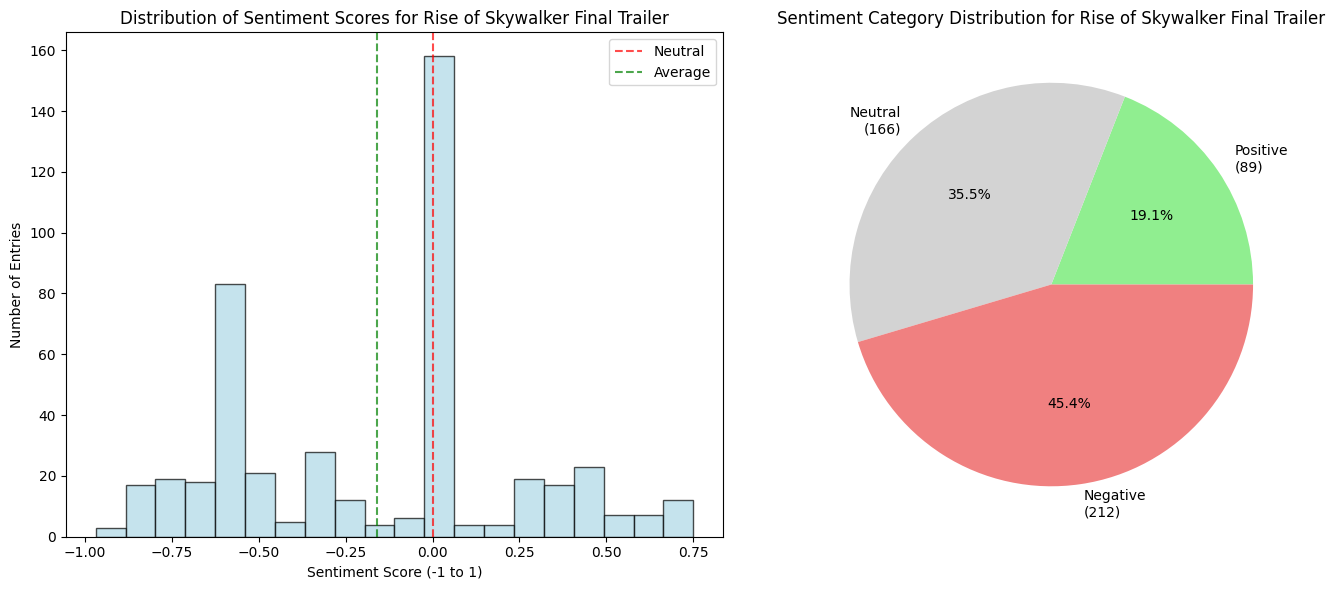

📊 Sentiment visualizations complete!


In [ ]:
#Extracted from HW4-1
#Create sentiment visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Sentiment distribution histogram
axes[0].hist(df['sentiment_score'], bins=20, color='lightblue', alpha=0.7, edgecolor='black')
axes[0].set_title('Distribution of Sentiment Scores for Rise of Skywalker Final Trailer')
axes[0].set_xlabel('Sentiment Score (-1 to 1)')
axes[0].set_ylabel('Number of Entries')
axes[0].axvline(0, color='red', linestyle='--', alpha=0.7, label='Neutral')
axes[0].axvline(df['sentiment_score'].mean(), color='green', linestyle='--', alpha=0.7, label='Average')
axes[0].legend()

# Sentiment categories pie chart
sentiment_counts = [positive, neutral, negative]
sentiment_labels = [f'Positive\n({positive})', f'Neutral\n({neutral})', f'Negative\n({negative})']
colors = ['lightgreen', 'lightgray', 'lightcoral']

axes[1].pie(sentiment_counts, labels=sentiment_labels, colors=colors, autopct='%1.1f%%')
axes[1].set_title('Sentiment Category Distribution for Rise of Skywalker Final Trailer')

plt.tight_layout()
plt.show()

print("📊 Sentiment visualizations complete!")

---

## Integration and Critical Analysis

In [ ]:
#Extracted from HW4-1
#Analyze word frequency in positive vs. negative entries
positive_entries = df[df['sentiment_score'] > 0.1]
negative_entries = df[df['sentiment_score'] < -0.1]

print("🔍 COMPARING WORDS IN POSITIVE vs. NEGATIVE ENTRIES")
print("=" * 55)

# Get top words from positive entries
positive_words = []
for word_list in positive_entries['meaningful_words']:
    positive_words.extend(word_list)
positive_freq = Counter(positive_words)

# Get top words from negative entries
negative_words = []
for word_list in negative_entries['meaningful_words']:
    negative_words.extend(word_list)
negative_freq = Counter(negative_words)

print(f"Top 10 words in POSITIVE entries ({len(positive_entries)} entries):")
for word, count in positive_freq.most_common(10):
    print(f"  {word:<15} ({count} times)")

print(f"\nTop 10 words in NEGATIVE entries ({len(negative_entries)} entries):")
for word, count in negative_freq.most_common(10):
    print(f"  {word:<15} ({count} times)")

🔍 COMPARING WORDS IN POSITIVE vs. NEGATIVE ENTRIES
Top 10 words in POSITIVE entries (89 entries):
  ends            (24 times)
  disney          (17 times)
  look            (16 times)
  taking          (14 times)
  friends         (14 times)
  2019            (14 times)
  end             (11 times)
  like            (11 times)
  jar             (10 times)
  comments        (10 times)

Top 10 words in NEGATIVE entries (212 entries):
  2019            (127 times)
  ends            (91 times)
  2020            (87 times)
  end             (38 times)
  disney          (22 times)
  darth           (17 times)
  palpatine       (17 times)
  jar             (14 times)
  bby             (14 times)
  december        (14 times)


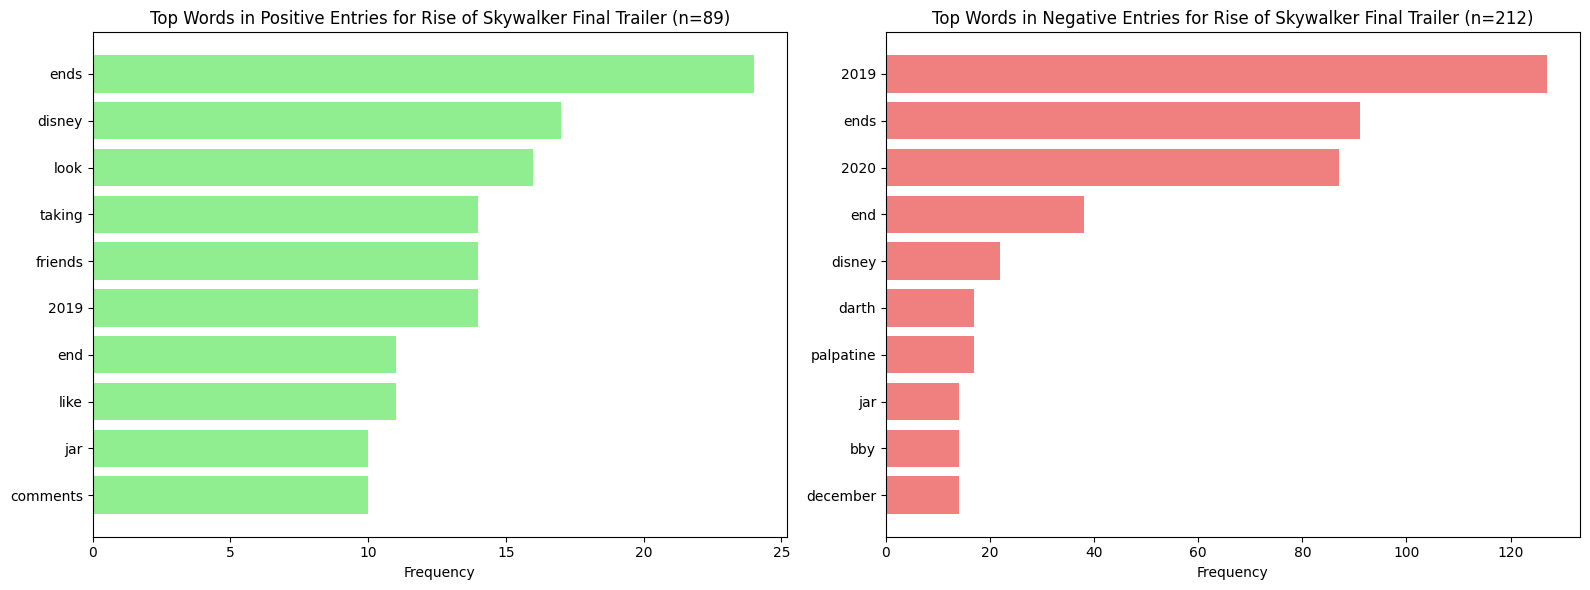

In [ ]:
#Extracted from HW4-1
#Create comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Positive words
pos_words = [word for word, count in positive_freq.most_common(10)]
pos_counts = [count for word, count in positive_freq.most_common(10)]

axes[0].barh(range(len(pos_words)), pos_counts, color='lightgreen')
axes[0].set_yticks(range(len(pos_words)))
axes[0].set_yticklabels(pos_words)
axes[0].set_title(f'Top Words in Positive Entries for Rise of Skywalker Final Trailer (n={len(positive_entries)})')
axes[0].set_xlabel('Frequency')
axes[0].invert_yaxis()

# Negative words
neg_words = [word for word, count in negative_freq.most_common(10)]
neg_counts = [count for word, count in negative_freq.most_common(10)]

axes[1].barh(range(len(neg_words)), neg_counts, color='lightcoral')
axes[1].set_yticks(range(len(neg_words)))
axes[1].set_yticklabels(neg_words)
axes[1].set_title(f'Top Words in Negative Entries for Rise of Skywalker Final Trailer (n={len(negative_entries)})')
axes[1].set_xlabel('Frequency')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

In [ ]:
#Extracted From HW4-1
#Save cleaned dataset checkpoint!
output_filename = 'ROS_YT_DS1_cleaned_data.csv'  # Replace LASTNAME with any name
df.to_csv(output_filename, index=False)

print(f"✅ Cleaned dataset saved as: {output_filename}")
print(f"\nDataset summary:")
print(f"- Total entries: {len(df)}")
print(f"- Columns: {df.columns.tolist()}")
print(f"- Average sentiment score: {df['sentiment_score'].mean():.3f}")
print(f"- Most frequent word: '{top_words[0][0]}' ({top_words[0][1]} times)")

✅ Cleaned dataset saved as: ROS_YT_DS1_cleaned_data.csv

Dataset summary:
- Total entries: 467
- Columns: ['style-scope src', 'Link to Commentor Account', 'Commentor', 'Comment Date', 'yt-simple-endpoint href 2', 'Comment', 'Likes', 'Replies', 'clean_text_sentiment', 'words', 'meaningful_words', 'sentiment_score', 'processed_for_topics', 'dominant_topic', 'topic_probability']
- Average sentiment score: -0.161
- Most frequent word: 'like' (152 times)


---

## Text Preprocessing for Topic Modeling

In [ ]:
#Extracted from HW4-2
#Lemmatizer is the second step for more refine tuning. This helps by taking the words run and running and capping them under the same umbrella.-TJ 11/10/25

lemmatizer = WordNetLemmatizer()

def preprocess_for_topics(text):
    """
    Aggressive text preprocessing for topic modeling:
    - Lowercase
    - Remove punctuation
    - Remove stopwords
    - Lemmatize (reduce to base form)
    """
    if pd.isna(text):
        return []

    # Convert to lowercase
    text = str(text).lower()

    # Remove punctuation and split into words
    words = re.findall(r'\b[a-z]+\b', text)

    # Remove stopwords and short words (< 3 characters)
    words = [word for word in words if word not in stopwords and len(word) >= 3]

    # Lemmatize words (reduce to base form)
    words = [lemmatizer.lemmatize(word) for word in words]

    return words

print("Preprocessing function ready")

#lemmatizer function added-TJ 11/7/25

Preprocessing function ready


In [ ]:
#Extraced from HW4-2
#Processing for entire specific dataset
df['processed_for_topics'] = df[text_column].apply(preprocess_for_topics) #be sure to add what specific text_column you wish to anaylze in this cell

print("Preprocessing complete!")
print(f"\nProcessed {len(df)} documents")
print(f"\nExample processed documents:")
for i in range(3):
    print(f"{i+1}. {df['processed_for_topics'].iloc[i][:10]}...")

#TJ-11/7/25

Preprocessing complete!

Processed 467 documents

Example processed documents:
1. ['crime', 'music']...
2. ['vader', 'pizza', 'order', 'palpatine', 'order']...
3. ['end', 'people', 'heard', 'third', 'life']...


---

## Building The Topic Model

In [ ]:
#Extracted from HW4-2
#Gensim dictionary and corpus
dictionary = corpora.Dictionary(df['processed_for_topics'])
corpus = [dictionary.doc2bow(doc) for doc in df['processed_for_topics']]

print("Dictionary and corpus created!")
print(f"Total unique words in dictionary: {len(dictionary)}")
print(f"Total documents in corpus: {len(corpus)}")
print(f"\nExample word-to-ID mappings:")
for i, (word_id, word) in enumerate(list(dictionary.items())[:10]):
    print(f"  ID {word_id}: {word}")

Dictionary and corpus created!
Total unique words in dictionary: 578
Total documents in corpus: 467

Example word-to-ID mappings:
  ID 0: crime
  ID 1: music
  ID 2: order
  ID 3: palpatine
  ID 4: pizza
  ID 5: vader
  ID 6: end
  ID 7: heard
  ID 8: life
  ID 9: people


In [ ]:
#Extracted from HW4-2
#Maybe use an experiment corpus function to help our findings for numbers of topics?-TJ
def train_and_display_topics(corpus, dictionary, num_topics):
    """
    Train an LDA model and display discovered topics
    """
    print(f"\n{'='*60}")
    print(f"MODEL WITH {num_topics} TOPICS")
    print(f"{'='*60}")

    model = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=42,
        passes=15,
        alpha='auto',
        eta='auto'
    )

    for idx in range(num_topics):
        words = model.show_topic(idx, 10)
        word_list = [word for word, prob in words]
        print(f"Topic {idx}: {', '.join(word_list)}")

    return model

# Trying 3, 5, and 7 topics
print("EXPERIMENTING WITH DIFFERENT NUMBERS OF TOPICS")
print("Watch how topics change as we increase the number...\n")

model_3 = train_and_display_topics(corpus, dictionary, 3)
model_5 = train_and_display_topics(corpus, dictionary, 5)
model_7 = train_and_display_topics(corpus, dictionary, 7)

EXPERIMENTING WITH DIFFERENT NUMBERS OF TOPICS
Watch how topics change as we increase the number...


MODEL WITH 3 TOPICS
Topic 0: end, luke, binks, jar, trailer, destroyer, skywalker, palpatine, sith, like
Topic 1: end, disney, comment, trailer, something, later, bby, season, december, palpatine
Topic 2: end, disney, look, friend, darth, jar, taking, gone, palpatine, ever

MODEL WITH 5 TOPICS
Topic 0: end, destroyer, ghost, obi, wan, money, palpatine, return, comment, empire
Topic 1: end, disney, bby, december, season, year, aby, later, next, trilogy
Topic 2: end, jar, disney, look, friend, palpatine, taking, gone, ever, darth
Topic 3: end, comment, darth, senate, joke, plagueis, always, tragedy, skywalker, like
Topic 4: end, trailer, something, disney, comment, people, think, music, prequel, binks

MODEL WITH 7 TOPICS
Topic 0: end, hello, wan, obi, shot, kenobi, order, money, search, misa
Topic 1: end, something, bby, december, season, aby, october, war, later, year
Topic 2: end, dis

In [ ]:
#Extracted from HW4-2
#This is for us to help choose our final model with our chosen number of topics-TJ
num_topics = 5  # Fill in your chosen number (3, 5, or 7)

print(f"Training final LDA model with {num_topics} topics...\n")

lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=20,  # More passes for better final model
    alpha='auto',
    eta='auto'
)

print("✅ Final model training complete!\n")
print("🎯 YOUR DISCOVERED TOPICS")
print("=" * 70)

for idx in range(num_topics):
    words = lda_model.show_topic(idx, 10)
    word_list = [word for word, prob in words]
    print(f"\nTopic {idx}: {', '.join(word_list)}")
    print(f"Your interpretation/label: _____________________")

Training final LDA model with 5 topics...

✅ Final model training complete!

🎯 YOUR DISCOVERED TOPICS

Topic 0: end, destroyer, ghost, obi, wan, money, palpatine, comment, empire, like
Your interpretation/label: _____________________

Topic 1: end, disney, bby, december, season, year, aby, later, next, trilogy
Your interpretation/label: _____________________

Topic 2: end, jar, disney, look, friend, palpatine, taking, gone, ever, senate
Your interpretation/label: _____________________

Topic 3: end, comment, darth, senate, joke, plagueis, always, tragedy, skywalker, like
Your interpretation/label: _____________________

Topic 4: end, trailer, something, disney, comment, people, think, music, prequel, binks
Your interpretation/label: _____________________


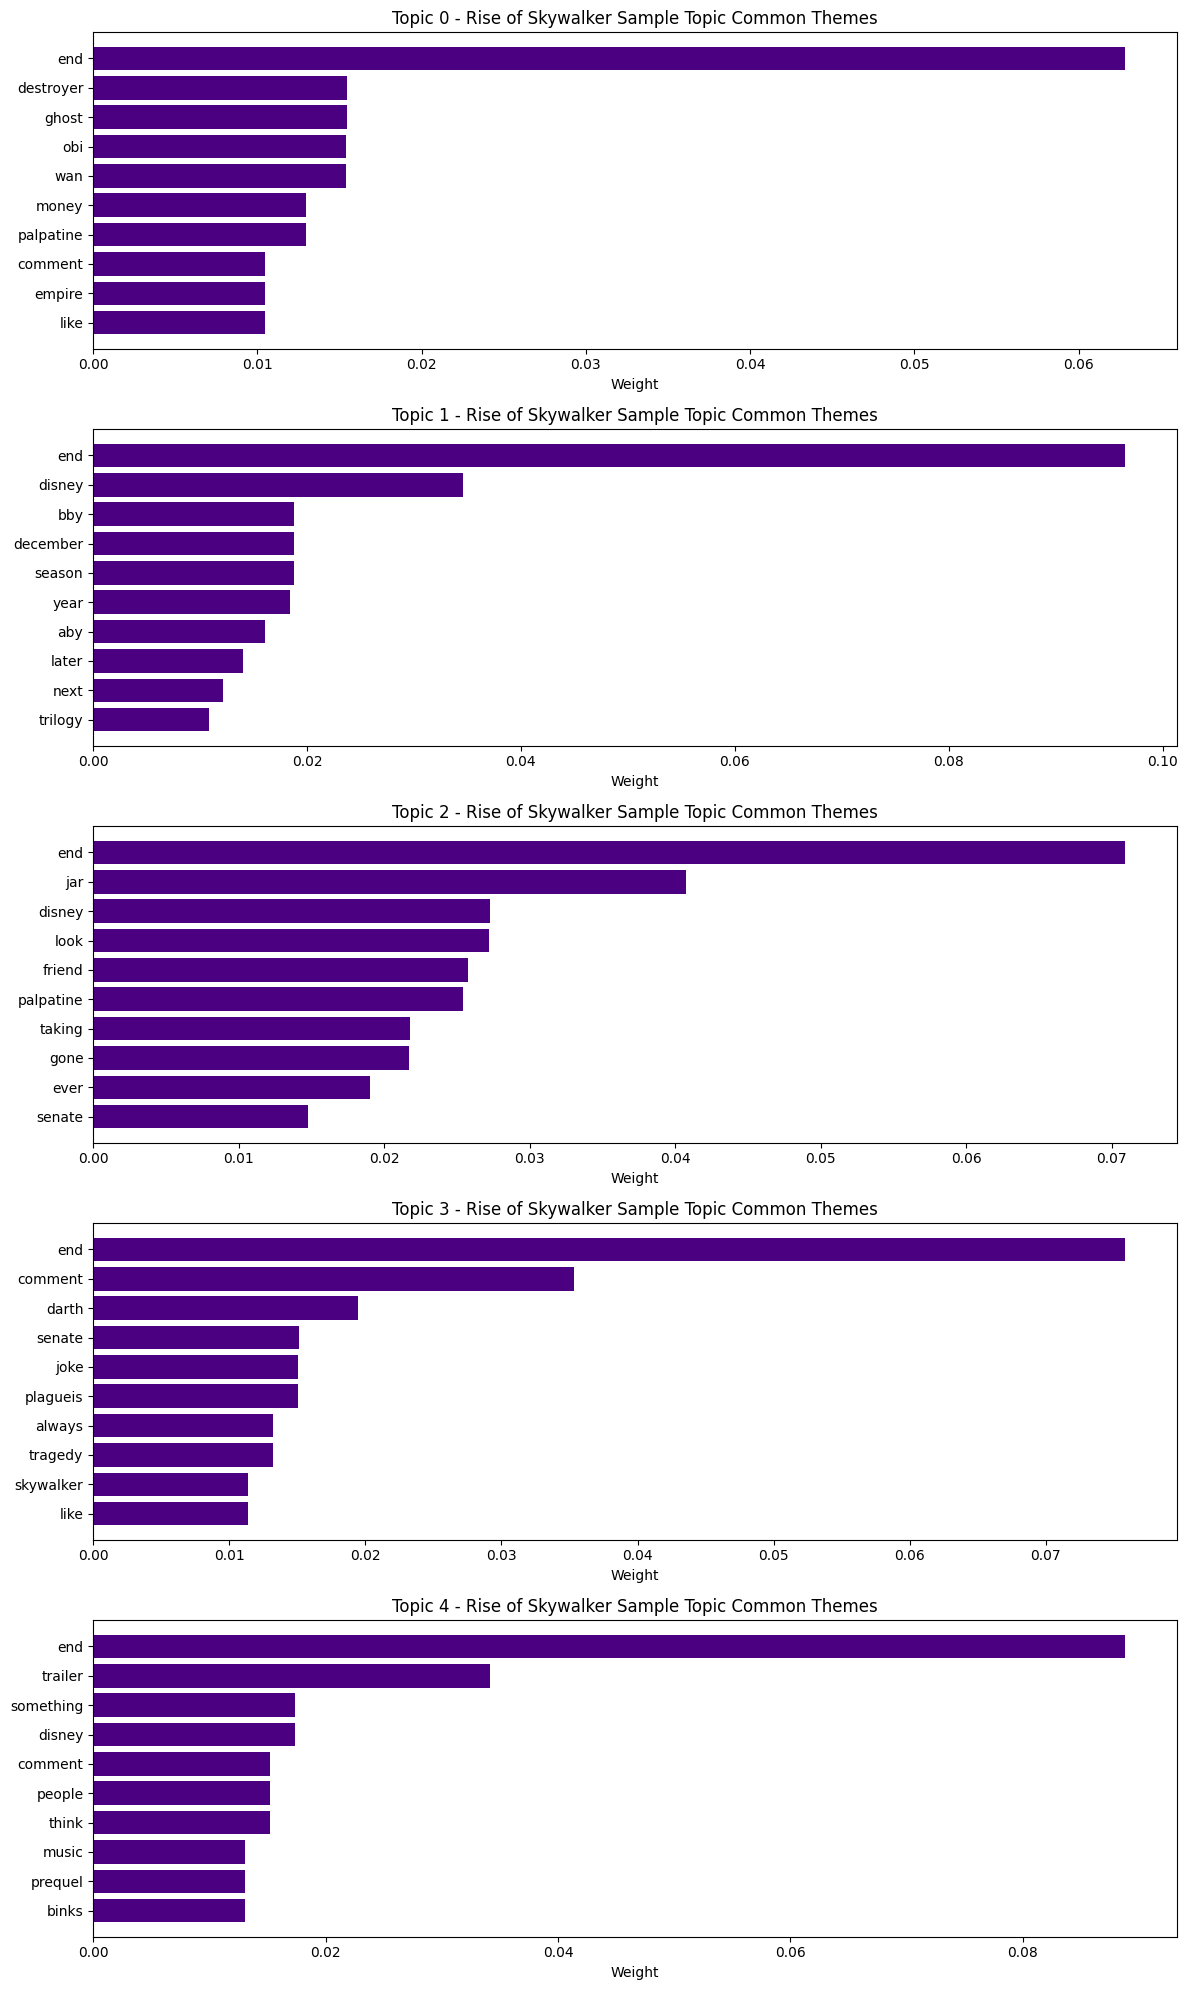

Topic visualizations complete!


In [ ]:
#Extracted from HW4-2
#Visualizing our topics
import matplotlib.pyplot as plt

fig, axes = plt.subplots(num_topics, 1, figsize=(12, 4*num_topics))

if num_topics == 1:
    axes = [axes]

for idx in range(num_topics):
    words_weights = lda_model.show_topic(idx, 10)
    words = [word for word, weight in words_weights]
    weights = [weight for word, weight in words_weights]

    axes[idx].barh(range(len(words)), weights, color='indigo')
    axes[idx].set_yticks(range(len(words)))
    axes[idx].set_yticklabels(words)
    axes[idx].set_xlabel('Weight')
    axes[idx].set_title(f'Topic {idx} - Rise of Skywalker Sample Topic Common Themes')
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()

print("Topic visualizations complete!")

---

## Validating Topic Assignments

In [ ]:
#Extracted from HW4-2
#Get dominant topic for each document
def get_document_topics(lda_model, corpus):
    """
    Get dominant topic assignment for each document
    """
    topic_assignments = []

    for doc in corpus:
        topic_dist = lda_model.get_document_topics(doc)
        if topic_dist:  # Check if not empty
            dominant_topic = max(topic_dist, key=lambda x: x[1])
            topic_assignments.append({
                'topic_num': dominant_topic[0],
                'topic_prob': round(dominant_topic[1], 3)
            })
        else:
            topic_assignments.append({
                'topic_num': -1,
                'topic_prob': 0.0
            })

    return topic_assignments

# Get topic assignments
topic_info = get_document_topics(lda_model, corpus)
df['dominant_topic'] = [t['topic_num'] for t in topic_info]
df['topic_probability'] = [t['topic_prob'] for t in topic_info]

print("Topic assignments complete!")
print(f"\nTopic distribution across documents:")
print(df['dominant_topic'].value_counts().sort_index())

#Added 11/10/25-TJ

Topic assignments complete!

Topic distribution across documents:
dominant_topic
0     58
1    108
2    133
3     91
4     77
Name: count, dtype: int64


In [ ]:
#Extracted from HW4-2
#Sample documents from each topic for validation
print("🔍 DOCUMENT-TOPIC VALIDATION CHECK")
print("=" * 70)
print("For each topic, read sample documents and assess if the assignment makes sense:\n")

for topic_num in range(num_topics):
    print(f"\n📌 TOPIC {topic_num}")
    print("=" * 50)

    # Get top words for this topic
    topic_words = lda_model.show_topic(topic_num, 8)
    word_list = [word for word, prob in topic_words]
    print(f"Keywords: {', '.join(word_list)}")

    # Get sample documents from this topic
    topic_docs = df[df['dominant_topic'] == topic_num]

    if len(topic_docs) == 0:
        print("No documents assigned to this topic.")
        continue

    print(f"\nDocuments in this topic: {len(topic_docs)}")
    print(f"\nSample documents (read and assess if topic assignment makes sense):\n")

    for i, (idx, row) in enumerate(topic_docs.head(3).iterrows(), 1):
        print(f"  {i}. {row[text_column][:150]}...")
        print(f"     Probability: {row['topic_probability']:.3f}")
        print()

#Added 11/10/25-TJ

🔍 DOCUMENT-TOPIC VALIDATION CHECK
For each topic, read sample documents and assess if the assignment makes sense:


📌 TOPIC 0
Keywords: end, destroyer, ghost, obi, wan, money, palpatine, comment

Documents in this topic: 58

Sample documents (read and assess if topic assignment makes sense):

  1. 2019: The Saga Ends

2025: El Camino: A Star Wars movie...
     Probability: 0.871

  2. Plot twist:



Luke finally gets his power converters....
     Probability: 0.958

  3. 2019: The Saga Ends
2020: The Saga Strikes Back
2021: Return of the Saga
......
     Probability: 0.909


📌 TOPIC 1
Keywords: end, disney, bby, december, season, year, aby, later

Documents in this topic: 108

Sample documents (read and assess if topic assignment makes sense):

  1. "The end of a saga."

There's some people who've heard that about Star Wars for the third time in their lives....
     Probability: 0.948

  2. Disney: “The saga will end”

Also Disney: “There is another”...
     Probability: 0.936

  3. 20

---

## Integration Across All Three Methods

In [ ]:
#Extracted from HW4-2
#Analyze sentiment patterns within each topic
print("📊 SENTIMENT BY TOPIC ANALYSIS")
print("=" * 50)

for topic_num in range(num_topics):
    topic_docs = df[df['dominant_topic'] == topic_num]

    if len(topic_docs) == 0:
        continue

    avg_sentiment = topic_docs['sentiment_score'].mean()

    # Get topic keywords
    topic_words = lda_model.show_topic(topic_num, 5)
    word_list = [word for word, prob in topic_words]

    print(f"\nTopic {topic_num}: {', '.join(word_list)}")
    print(f"  Documents: {len(topic_docs)}")
    print(f"  Average sentiment: {avg_sentiment:.3f}")
    print(f"  Sentiment range: {topic_docs['sentiment_score'].min():.3f} to {topic_docs['sentiment_score'].max():.3f}")

📊 SENTIMENT BY TOPIC ANALYSIS

Topic 0: end, destroyer, ghost, obi, wan
  Documents: 58
  Average sentiment: -0.239
  Sentiment range: -0.802 to 0.421

Topic 1: end, disney, bby, december, season
  Documents: 108
  Average sentiment: -0.146
  Sentiment range: -0.970 to 0.751

Topic 2: end, jar, disney, look, friend
  Documents: 133
  Average sentiment: -0.168
  Sentiment range: -0.802 to 0.750

Topic 3: end, comment, darth, senate, joke
  Documents: 91
  Average sentiment: -0.121
  Sentiment range: -0.840 to 0.660

Topic 4: end, trailer, something, disney, comment
  Documents: 77
  Average sentiment: -0.159
  Sentiment range: -0.802 to 0.750


/tmp/ipython-input-3167477060.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(topic_sentiment_data, labels=[f'Topic {i}' for i in range(num_topics)])


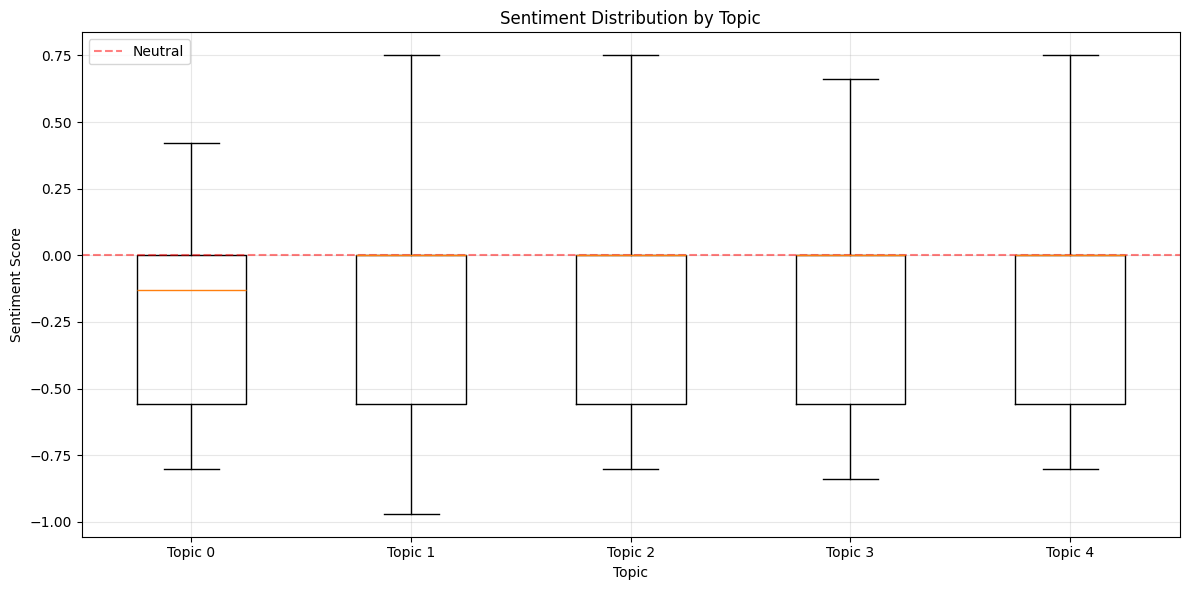

📊 Sentiment by topic visualization complete!


In [ ]:
#Extracted from HW4-2
#Visualize sentiment distribution by topic
fig, ax = plt.subplots(figsize=(12, 6))

# Create box plot of sentiment scores by topic
topic_sentiment_data = [df[df['dominant_topic'] == i]['sentiment_score'].values
                        for i in range(num_topics)]

ax.boxplot(topic_sentiment_data, labels=[f'Topic {i}' for i in range(num_topics)])
ax.set_xlabel('Topic')
ax.set_ylabel('Sentiment Score')
ax.set_title('Sentiment Distribution by Topic')
ax.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Neutral')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Sentiment by topic visualization complete!")

In [ ]:
#Extracted from HW4-2
#Create comprehensive summary
print("📋 COMPLETE ANALYTICAL SUMMARY")
print("=" * 60)
print(f"\nDataset: {len(df)} documents")
print(f"\n1️⃣ TERM FREQUENCY (from HW4-1):")
print(f"   Vocabulary size: {len(dictionary)} unique words")
print(f"   [Your top words from HW4-1]")

print(f"\n2️⃣ SENTIMENT ANALYSIS (from HW4-1):")
print(f"   Average sentiment: {df['sentiment_score'].mean():.3f}")
print(f"   Positive: {len(df[df['sentiment_score'] > 0.1])} ({len(df[df['sentiment_score'] > 0.1])/len(df)*100:.1f}%)")
print(f"   Neutral: {len(df[(df['sentiment_score'] >= -0.1) & (df['sentiment_score'] <= 0.1)])} ({len(df[(df['sentiment_score'] >= -0.1) & (df['sentiment_score'] <= 0.1)])/len(df)*100:.1f}%)")
print(f"   Negative: {len(df[df['sentiment_score'] < -0.1])} ({len(df[df['sentiment_score'] < -0.1])/len(df)*100:.1f}%)")

print(f"\n3️⃣ TOPIC MODELING (HW4-2):")
print(f"   Number of topics: {num_topics}")
for topic_num in range(num_topics):
    topic_docs = df[df['dominant_topic'] == topic_num]
    if len(topic_docs) > 0:
        topic_words = lda_model.show_topic(topic_num, 3)
        word_list = [word for word, prob in topic_words]
        print(f"   Topic {topic_num} ({len(topic_docs)} docs, avg sentiment {topic_docs['sentiment_score'].mean():.2f}): {', '.join(word_list)}")

📋 COMPLETE ANALYTICAL SUMMARY

Dataset: 467 documents

1️⃣ TERM FREQUENCY (from HW4-1):
   Vocabulary size: 578 unique words
   [Your top words from HW4-1]

2️⃣ SENTIMENT ANALYSIS (from HW4-1):
   Average sentiment: -0.161
   Positive: 89 (19.1%)
   Neutral: 166 (35.5%)
   Negative: 212 (45.4%)

3️⃣ TOPIC MODELING (HW4-2):
   Number of topics: 5
   Topic 0 (58 docs, avg sentiment -0.24): end, destroyer, ghost
   Topic 1 (108 docs, avg sentiment -0.15): end, disney, bby
   Topic 2 (133 docs, avg sentiment -0.17): end, jar, disney
   Topic 3 (91 docs, avg sentiment -0.12): end, comment, darth
   Topic 4 (77 docs, avg sentiment -0.16): end, trailer, something


In [ ]:
#Extracted from HW4-2
#Save CHECKPOINT for CURRENT DS1 Analysis Code Dataset!
output_filename = 'Goon Squad_integrated_data_set1.csv'  #Replace with Group/Team name
df.to_csv(output_filename, index=False)

print(f"Integrated dataset saved as: {output_filename}")
print(f"\nFinal dataset summary:")
print(f"- Total entries: {len(df)}")
print(f"- Columns: {df.columns.tolist()}")
print(f"- Number of topics: {num_topics}")
print(f"- Average sentiment: {df['sentiment_score'].mean():.3f}")

Integrated dataset saved as: Goon Squad_integrated_data_set1.csv

Final dataset summary:
- Total entries: 467
- Columns: ['style-scope src', 'Link to Commentor Account', 'Commentor', 'Comment Date', 'yt-simple-endpoint href 2', 'Comment', 'Likes', 'Replies', 'clean_text_sentiment', 'words', 'meaningful_words', 'sentiment_score', 'processed_for_topics', 'dominant_topic', 'topic_probability']
- Number of topics: 5
- Average sentiment: -0.161


# **DS2 Analysis Code!**

In [ ]:
#MUST RUN BEFORE ANY DS2 ANALYSIS
df = ds2

In [ ]:
#Extracted from HW4-1
#Checkpoint 1: Verify your data loaded correctly
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Replace 'YOUR_TEXT_COLUMN' with your actual text column name
text_column = 'weapons_reviews'  # Fill in your main text column name

print(f"Text column has {df[text_column].isna().sum()} missing values")
print(f"Sample text: {df[text_column].iloc[0][:200]}")

Dataset shape: (560, 5)
Columns: ['review-data href', 'audience-reviews__name', 'audience-reviews__name href', 'audience-reviews__duration', 'weapons_reviews']
Text column has 0 missing values
Sample text: Boring, also ruined Palpatine in my opinion.


In [ ]:
#Extracted from HW4-1
#Explore your dataset structure
print("=== DATASET EXPLORATION ===")
print(f"Total entries: {len(df)}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nFirst few rows:")
df.head()

=== DATASET EXPLORATION ===
Total entries: 560

Data types:
review-data href               object
audience-reviews__name         object
audience-reviews__name href    object
audience-reviews__duration     object
weapons_reviews                object
dtype: object

First few rows:


,review-data href,audience-reviews__name,audience-reviews__name href,audience-reviews__duration,weapons_reviews
0,https://www.rottentomatoes.com/profiles/A4XC0Y...,Bill J.,https://www.rottentomatoes.com/profiles/A4XC0Y...,"Oct 20, 2025","Boring, also ruined Palpatine in my opinion."
1,https://www.rottentomatoes.com/profiles/RMBFYj...,Luis Ángel S,https://www.rottentomatoes.com/profiles/RMBFYj...,"Oct 16, 2025",This film made an effort to rectify past issue...
2,https://www.rottentomatoes.com/profiles/RMQhmz...,Next C,https://www.rottentomatoes.com/profiles/RMQhmz...,"Oct 9, 2025",⭐️⭐️⭐️⭐️ (4/5)\n\nLoved it! The Rise of Skywal...
3,https://www.rottentomatoes.com/profiles/K1Oc43...,Bruce P,https://www.rottentomatoes.com/profiles/K1Oc43...,"Oct 9, 2025",Given the circumstances (Carrie Fisher's death...
4,https://www.rottentomatoes.com/profiles/jENUWw...,A Clanker N,https://www.rottentomatoes.com/profiles/jENUWw...,"Oct 3, 2025","Not Recommended at all, the whole film seems r..."


In [ ]:
#Extracted from HW4-2
#Stopwords section added by TJ 11/7/25
stopwords = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers",
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is",
    "are", "was", "were", "be", "been", "being", "have", "has", "had", "having",
    "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or",
    "because", "as", "until", "while", "of", "at", "by", "for", "with", "about",
    "against", "between", "into", "through", "during", "before", "after", "above",
    "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under",
    "again", "further", "then", "once", "here", "there", "when", "where", "why",
    "how", "all", "both", "each", "few", "more", "most", "other", "some", "such",
    "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very",
    "s", "t", "can", "will", "just", "don", "should", "now", "ve", "ll", "amp",
    "also", "would", "could", "get", "go", "one", "two", "see", "time", "way",
    "may", "said", "say", "new", "first", "last", "long", "little", "much",
    "well", "still", "even", "back", "good", "many", "make", "made", "us", "really"
]

custom_stopwords = ["star", "wars", "story", "movie", "film", "movies", "saga", "rise", "emperor", "rey"]  # Fill in words specific to our dataset

stopwords.extend(custom_stopwords)

print(f"Stopwords list loaded: {len(stopwords)} words to filter out")
print(f"Custom stopwords added: {custom_stopwords}")

Stopwords list loaded: 168 words to filter out
Custom stopwords added: ['star', 'wars', 'story', 'movie', 'film', 'movies', 'saga', 'rise', 'emperor', 'rey']


In [ ]:
#Extracted from HW4-1
#Text processing functions (First step approach to filtering)-TJ 11/10/25
def split_into_words(text):
    """Split text into words (same approach as HW1)"""
    if pd.isna(text):  # Handle missing text
        return []
    lowercase_text = str(text).lower()
    # Split text into words by looking for places where letters/numbers are not present
    split_words = re.split("\\W+", lowercase_text)
    return [word for word in split_words if word]  # Remove empty strings

def clean_for_sentiment(text):
    """Clean text for sentiment analysis (keep punctuation!)"""
    if pd.isna(text):
        return ""
    # Keep punctuation and capitalization - VADER needs them!
    return str(text).strip()

print("✅ Text processing functions ready")

✅ Text processing functions ready


In [ ]:
#Extracted from HW4-1
#Apply text cleaning to your dataset
# Replace 'text_column' with your actual column name

# Create cleaned text for sentiment analysis (keep punctuation)
df['clean_text_sentiment'] = df[text_column].apply(clean_for_sentiment)

# Create word lists for term frequency analysis (like HW1)
df['words'] = df[text_column].apply(split_into_words)
df['meaningful_words'] = df['words'].apply(lambda word_list: [word for word in word_list if word not in stopwords])

print("✅ Text cleaning complete")
print(f"Sample cleaned text for sentiment: {df['clean_text_sentiment'].iloc[0][:100]}...")
print(f"Sample meaningful words: {df['meaningful_words'].iloc[0][:10]}")

#Added by TJ 11/10/25

✅ Text cleaning complete
Sample cleaned text for sentiment: Boring, also ruined Palpatine in my opinion....
Sample meaningful words: ['boring', 'ruined', 'palpatine', 'opinion']


In [ ]:
#Extracted from HW4-1
#Checkpoint 2: Check your cleaning worked
sample_text = df[text_column].iloc[0]
print(f"Original: {sample_text[:100]}")
print(f"For sentiment: {df['clean_text_sentiment'].iloc[0][:100]}")
print(f"Meaningful words: {df['meaningful_words'].iloc[0][:15]}")
# Should show: sentiment text keeps punctuation, meaningful words exclude stopwords

Original: Boring, also ruined Palpatine in my opinion.
For sentiment: Boring, also ruined Palpatine in my opinion.
Meaningful words: ['boring', 'ruined', 'palpatine', 'opinion']


---

## Term Frequency Analysis

In [ ]:
#Extracted from HW4-1
#Combine all meaningful words from your dataset (like HW1)
all_meaningful_words = []
for word_list in df['meaningful_words']:
    all_meaningful_words.extend(word_list)

# Count word frequencies (same as HW1)
word_frequency = Counter(all_meaningful_words)
top_words = word_frequency.most_common(20)  # Get top 20 words

print("🔤 TERM FREQUENCY ANALYSIS RESULTS")
print("=" * 40)
print(f"Total words analyzed: {len(all_meaningful_words):,}")
print(f"Unique words found: {len(word_frequency):,}")
print(f"\nTop 20 most frequent words:")

for i, (word, count) in enumerate(top_words, 1):
    print(f"{i:2d}. {word:<15} ({count:,} times)")

🔤 TERM FREQUENCY ANALYSIS RESULTS
Total words analyzed: 14,834
Unique words found: 4,056

Top 20 most frequent words:
 1. like            (152 times)
 2. trilogy         (150 times)
 3. palpatine       (141 times)
 4. jedi            (124 times)
 5. skywalker       (121 times)
 6. plot            (115 times)
 7. bad             (111 times)
 8. franchise       (79 times)
 9. character       (78 times)
10. characters      (74 times)
11. force           (69 times)
12. great           (69 times)
13. end             (67 times)
14. better          (67 times)
15. worst           (66 times)
16. disney          (60 times)
17. somehow         (54 times)
18. episode         (53 times)
19. terrible        (52 times)
20. best            (51 times)


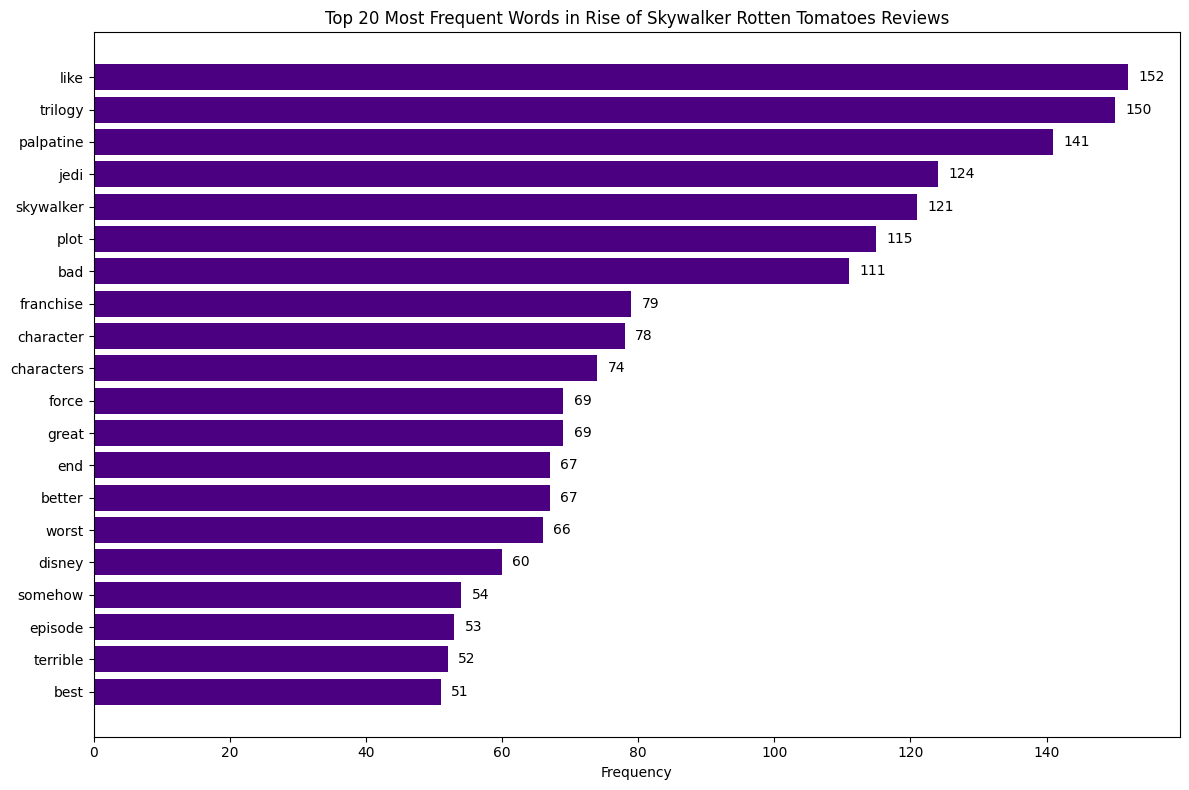

📊 Term frequency visualization complete!


In [ ]:
#Extracted from HW4-1
#Create visualization of top words
words = [word for word, count in top_words]
counts = [count for word, count in top_words]

plt.figure(figsize=(12, 8))
plt.barh(range(len(words)), counts, color='indigo')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency')
plt.title(f'Top {len(words)} Most Frequent Words in Rise of Skywalker Rotten Tomatoes Reviews')
plt.gca().invert_yaxis()  # Put highest frequency at top

# Add count labels on bars
for i, count in enumerate(counts):
    plt.text(count + max(counts)*0.01, i, str(count), va='center')

plt.tight_layout()
plt.show()

print("📊 Term frequency visualization complete!")

---

## Sentiment Analysis with VADER

In [ ]:
#Extracted from HW4-1
#Install and import VADER
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

print("✅ VADER installed and ready for sentiment analysis!")

✅ VADER installed and ready for sentiment analysis!


In [ ]:
#Extracted from HW4-1
#Checkpoint 3: VADER setup
test_text = "This assignment is surprisingly interesting!"
test_result = analyzer.polarity_scores(test_text)
print(f"Test text: {test_text}")
print(f"VADER result: {test_result}")
# Should see: {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6588} (or similar)

Test text: This assignment is surprisingly interesting!
VADER result: {'neg': 0.0, 'neu': 0.366, 'pos': 0.634, 'compound': 0.636}


In [ ]:
#Extracted from HW4-1
#Apply sentiment analysis to your entire dataset
def get_sentiment_score(text):
    """Get compound sentiment score for a text"""
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Apply sentiment analysis to your entire dataset
df['sentiment_score'] = df['clean_text_sentiment'].apply(get_sentiment_score) # Fill in: what function?

print("✅ Sentiment analysis complete for entire dataset!")
print(f"\nSentiment score range: {df['sentiment_score'].min():.3f} to {df['sentiment_score'].max():.3f}")
print(f"Average sentiment: {df['sentiment_score'].mean():.3f}")

✅ Sentiment analysis complete for entire dataset!

Sentiment score range: -0.997 to 0.994
Average sentiment: -0.139


In [ ]:
#Extracted from HW4-1
#Analyze sentiment patterns in your data
print("🎭 SENTIMENT ANALYSIS SUMMARY")
print("=" * 35)

# Basic statistics
print(f"Total entries analyzed: {len(df)}")
print(f"Average sentiment: {df['sentiment_score'].mean():.3f}")
print(f"Most positive entry: {df['sentiment_score'].max():.3f}")
print(f"Most negative entry: {df['sentiment_score'].min():.3f}")
print(f"Standard deviation: {df['sentiment_score'].std():.3f}")

# Categorize sentiments
positive = len(df[df['sentiment_score'] > 0.1])
neutral = len(df[(df['sentiment_score'] >= -0.1) & (df['sentiment_score'] <= 0.1)])
negative = len(df[df['sentiment_score'] < -0.1])

print(f"\nSentiment distribution:")
print(f"Positive (>0.1): {positive} ({positive/len(df)*100:.1f}%)")
print(f"Neutral (-0.1 to 0.1): {neutral} ({neutral/len(df)*100:.1f}%)")
print(f"Negative (<-0.1): {negative} ({negative/len(df)*100:.1f}%)")

🎭 SENTIMENT ANALYSIS SUMMARY
Total entries analyzed: 560
Average sentiment: -0.139
Most positive entry: 0.994
Most negative entry: -0.997
Standard deviation: 0.667

Sentiment distribution:
Positive (>0.1): 200 (35.7%)
Neutral (-0.1 to 0.1): 52 (9.3%)
Negative (<-0.1): 308 (55.0%)


In [ ]:
#Extracted from HW4-1
#Find most positive and negative examples
most_positive = df.loc[df['sentiment_score'].idxmax()]
most_negative = df.loc[df['sentiment_score'].idxmin()]

print(f"📈 MOST POSITIVE ENTRY (score: {most_positive['sentiment_score']:.3f}):")
print(f"Text: {most_positive['clean_text_sentiment'][:200]}...")
print()
print(f"📉 MOST NEGATIVE ENTRY (score: {most_negative['sentiment_score']:.3f}):")
print(f"Text: {most_negative['clean_text_sentiment'][:200]}...")

📈 MOST POSITIVE ENTRY (score: 0.994):
Text: When I watched the first one (the part 7), I was like, what the heck is this?  Rey did not go through the trials and tribulations like Luke Skywalker did.  She just became a Jedi and mastered the forc...

📉 MOST NEGATIVE ENTRY (score: -0.997):
Text: By far one of the worst films created in the modern era. The sequel trilogy struggles at best, but this film takes the cake. It does things without purpose or planning, perhaps the only remaining dyna...


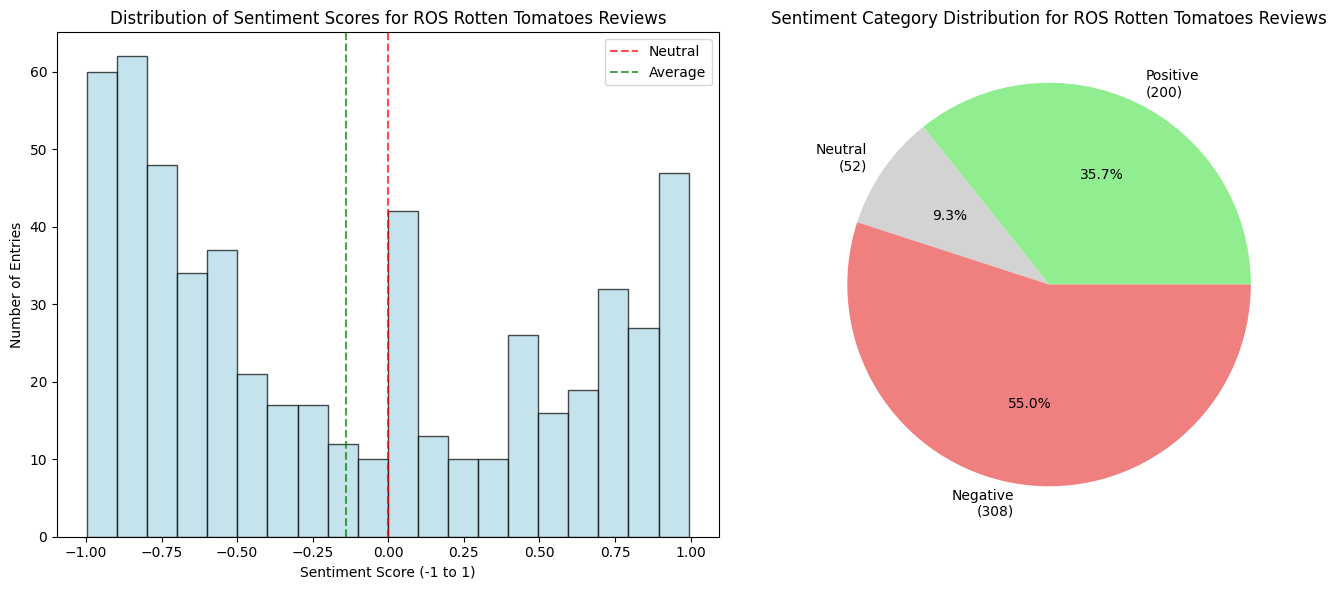

📊 Sentiment visualizations complete!


In [ ]:
#Extracted from HW4-1
#Create sentiment visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Sentiment distribution histogram
axes[0].hist(df['sentiment_score'], bins=20, color='lightblue', alpha=0.7, edgecolor='black')
axes[0].set_title('Distribution of Sentiment Scores for ROS Rotten Tomatoes Reviews')
axes[0].set_xlabel('Sentiment Score (-1 to 1)')
axes[0].set_ylabel('Number of Entries')
axes[0].axvline(0, color='red', linestyle='--', alpha=0.7, label='Neutral')
axes[0].axvline(df['sentiment_score'].mean(), color='green', linestyle='--', alpha=0.7, label='Average')
axes[0].legend()

# Sentiment categories pie chart
sentiment_counts = [positive, neutral, negative]
sentiment_labels = [f'Positive\n({positive})', f'Neutral\n({neutral})', f'Negative\n({negative})']
colors = ['lightgreen', 'lightgray', 'lightcoral']

axes[1].pie(sentiment_counts, labels=sentiment_labels, colors=colors, autopct='%1.1f%%')
axes[1].set_title('Sentiment Category Distribution for ROS Rotten Tomatoes Reviews')

plt.tight_layout()
plt.show()

print("📊 Sentiment visualizations complete!")

---

## Integration and Critical Analysis

In [ ]:
#Extracted from HW4-1
#Analyze word frequency in positive vs. negative entries
positive_entries = df[df['sentiment_score'] > 0.1]
negative_entries = df[df['sentiment_score'] < -0.1]

print("🔍 COMPARING WORDS IN POSITIVE vs. NEGATIVE ENTRIES")
print("=" * 55)

# Get top words from positive entries
positive_words = []
for word_list in positive_entries['meaningful_words']:
    positive_words.extend(word_list)
positive_freq = Counter(positive_words)

# Get top words from negative entries
negative_words = []
for word_list in negative_entries['meaningful_words']:
    negative_words.extend(word_list)
negative_freq = Counter(negative_words)

print(f"Top 10 words in POSITIVE entries ({len(positive_entries)} entries):")
for word, count in positive_freq.most_common(10):
    print(f"  {word:<15} ({count} times)")

print(f"\nTop 10 words in NEGATIVE entries ({len(negative_entries)} entries):")
for word, count in negative_freq.most_common(10):
    print(f"  {word:<15} ({count} times)")

🔍 COMPARING WORDS IN POSITIVE vs. NEGATIVE ENTRIES
Top 10 words in POSITIVE entries (200 entries):
  like            (86 times)
  skywalker       (68 times)
  palpatine       (64 times)
  jedi            (47 times)
  great           (47 times)
  trilogy         (46 times)
  better          (40 times)
  force           (39 times)
  plot            (37 times)
  characters      (32 times)

Top 10 words in NEGATIVE entries (308 entries):
  trilogy         (93 times)
  bad             (86 times)
  plot            (73 times)
  jedi            (71 times)
  palpatine       (68 times)
  like            (60 times)
  worst           (58 times)
  skywalker       (49 times)
  character       (45 times)
  terrible        (45 times)


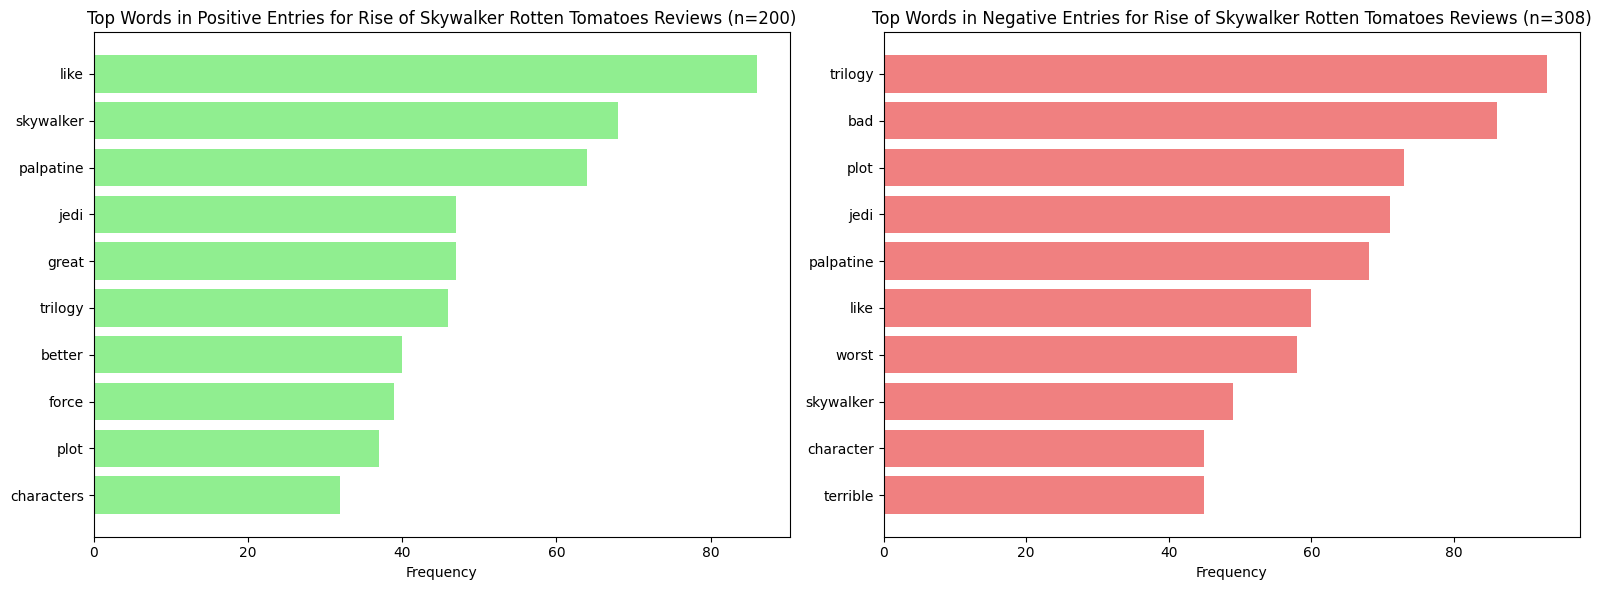

In [ ]:
#Extracted from HW4-1
#Create comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Positive words
pos_words = [word for word, count in positive_freq.most_common(10)]
pos_counts = [count for word, count in positive_freq.most_common(10)]

axes[0].barh(range(len(pos_words)), pos_counts, color='lightgreen')
axes[0].set_yticks(range(len(pos_words)))
axes[0].set_yticklabels(pos_words)
axes[0].set_title(f'Top Words in Positive Entries for Rise of Skywalker Rotten Tomatoes Reviews (n={len(positive_entries)})')
axes[0].set_xlabel('Frequency')
axes[0].invert_yaxis()

# Negative words
neg_words = [word for word, count in negative_freq.most_common(10)]
neg_counts = [count for word, count in negative_freq.most_common(10)]

axes[1].barh(range(len(neg_words)), neg_counts, color='lightcoral')
axes[1].set_yticks(range(len(neg_words)))
axes[1].set_yticklabels(neg_words)
axes[1].set_title(f'Top Words in Negative Entries for Rise of Skywalker Rotten Tomatoes Reviews (n={len(negative_entries)})')
axes[1].set_xlabel('Frequency')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

In [ ]:
#Extracted from HW4-1
#Save cleaned dataset checkpoint!
output_filename = 'ROS_RT_DS2_cleaned_data.csv'  # Replace LASTNAME with any save name
df.to_csv(output_filename, index=False)

print(f"✅ Cleaned dataset saved as: {output_filename}")
print(f"\nDataset summary:")
print(f"- Total entries: {len(df)}")
print(f"- Columns: {df.columns.tolist()}")
print(f"- Average sentiment score: {df['sentiment_score'].mean():.3f}")
print(f"- Most frequent word: '{top_words[0][0]}' ({top_words[0][1]} times)")

✅ Cleaned dataset saved as: ROS_RT_DS2_cleaned_data.csv

Dataset summary:
- Total entries: 560
- Columns: ['review-data href', 'audience-reviews__name', 'audience-reviews__name href', 'audience-reviews__duration', 'weapons_reviews', 'clean_text_sentiment', 'words', 'meaningful_words', 'sentiment_score']
- Average sentiment score: -0.139
- Most frequent word: 'like' (152 times)


---

## Text Preprocessing for Topic Modeling

In [ ]:
#Extracted from HW4-2
#Lemmatizer is the second step for more refine tuning. This helps by taking the words run and running and capping them under the same umbrella.-TJ 11/10/25

lemmatizer = WordNetLemmatizer()

def preprocess_for_topics(text):
    """
    Aggressive text preprocessing for topic modeling:
    - Lowercase
    - Remove punctuation
    - Remove stopwords
    - Lemmatize (reduce to base form)
    """
    if pd.isna(text):
        return []

    # Convert to lowercase
    text = str(text).lower()

    # Remove punctuation and split into words
    words = re.findall(r'\b[a-z]+\b', text)

    # Remove stopwords and short words (< 3 characters)
    words = [word for word in words if word not in stopwords and len(word) >= 3]

    # Lemmatize words (reduce to base form)
    words = [lemmatizer.lemmatize(word) for word in words]

    return words

print("Preprocessing function ready")

#lemmatizer function added-TJ 11/7/25

Preprocessing function ready


In [ ]:
#Extracted from HW4-2
#Processing for entire specific dataset
df['processed_for_topics'] = df[text_column].apply(preprocess_for_topics) #be sure to add what specific text_column you wish to anaylze in this cell

print("Preprocessing complete!")
print(f"\nProcessed {len(df)} documents")
print(f"\nExample processed documents:")
for i in range(3):
    print(f"{i+1}. {df['processed_for_topics'].iloc[i][:10]}...")

#TJ-11/7/25

Preprocessing complete!

Processed 560 documents

Example processed documents:
1. ['boring', 'ruined', 'palpatine', 'opinion']...
2. ['effort', 'rectify', 'past', 'issue', 'disney', 'seemed', 'recognize', 'error', 'essence', 'compromised']...
3. ['loved', 'skywalker', 'chaotic', 'time', 'emotional', 'visually', 'spectacular', 'film', 'ever', 'frame']...


---

## Building The Topic Model

In [ ]:
#Extracted from HW4-2
#Gensim dictionary and corpus
dictionary = corpora.Dictionary(df['processed_for_topics'])
corpus = [dictionary.doc2bow(doc) for doc in df['processed_for_topics']]

print("Dictionary and corpus created!")
print(f"Total unique words in dictionary: {len(dictionary)}")
print(f"Total documents in corpus: {len(corpus)}")
print(f"\nExample word-to-ID mappings:")
for i, (word_id, word) in enumerate(list(dictionary.items())[:10]):
    print(f"  ID {word_id}: {word}")

Dictionary and corpus created!
Total unique words in dictionary: 3622
Total documents in corpus: 560

Example word-to-ID mappings:
  ID 0: boring
  ID 1: opinion
  ID 2: palpatine
  ID 3: ruined
  ID 4: ability
  ID 5: acceptable
  ID 6: accolade
  ID 7: acknowledged
  ID 8: action
  ID 9: adopting


In [ ]:
#Extracted from HW4-2
#Maybe use an experiment corpus function to help our findings for numbers of topics?-TJ
def train_and_display_topics(corpus, dictionary, num_topics):
    """
    Train an LDA model and display discovered topics
    """
    print(f"\n{'='*60}")
    print(f"MODEL WITH {num_topics} TOPICS")
    print(f"{'='*60}")

    model = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=42,
        passes=15,
        alpha='auto',
        eta='auto'
    )

    for idx in range(num_topics):
        words = model.show_topic(idx, 10)
        word_list = [word for word, prob in words]
        print(f"Topic {idx}: {', '.join(word_list)}")

    return model

# Trying 3, 5, and 7 topics
print("EXPERIMENTING WITH DIFFERENT NUMBERS OF TOPICS")
print("Watch how topics change as we increase the number...\n")

model_3 = train_and_display_topics(corpus, dictionary, 3)
model_5 = train_and_display_topics(corpus, dictionary, 5)
model_7 = train_and_display_topics(corpus, dictionary, 7)

EXPERIMENTING WITH DIFFERENT NUMBERS OF TOPICS
Watch how topics change as we increase the number...


MODEL WITH 3 TOPICS
Topic 0: skywalker, character, conclusion, trilogy, plot, palpatine, jedi, watch, fan, great
Topic 1: trilogy, like, plot, palpatine, somehow, ever, worst, character, bad, end
Topic 2: like, palpatine, trilogy, jedi, character, bad, plot, skywalker, franchise, end

MODEL WITH 5 TOPICS
Topic 0: character, skywalker, conclusion, watch, plot, fan, franchise, idea, feel, best
Topic 1: like, palpatine, somehow, plot, character, returned, entire, trilogy, great, episode
Topic 2: like, character, palpatine, bad, skywalker, jedi, end, plot, franchise, trilogy
Topic 3: trilogy, jedi, like, palpatine, plot, character, skywalker, bad, better, worst
Topic 4: bad, amazing, jedi, sense, trilogy, force, ghost, thing, palpatine, episode

MODEL WITH 7 TOPICS
Topic 0: character, skywalker, conclusion, plot, watch, episode, great, franchise, trilogy, best
Topic 1: like, character, exp

In [ ]:
#Extracted from HW4-2
#This is for us to help choose our final model with our chosen number of topics-TJ
num_topics = 5  # Fill in your chosen number (3, 5, or 7)

print(f"Training final LDA model with {num_topics} topics...\n")

lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=20,  # More passes for better final model
    alpha='auto',
    eta='auto'
)

print("✅ Final model training complete!\n")
print("🎯 YOUR DISCOVERED TOPICS")
print("=" * 70)

for idx in range(num_topics):
    words = lda_model.show_topic(idx, 10)
    word_list = [word for word, prob in words]
    print(f"\nTopic {idx}: {', '.join(word_list)}")

Training final LDA model with 5 topics...

✅ Final model training complete!

🎯 YOUR DISCOVERED TOPICS

Topic 0: character, skywalker, conclusion, watch, plot, fan, franchise, idea, feel, best

Topic 1: like, palpatine, somehow, plot, character, returned, trilogy, entire, great, episode

Topic 2: like, palpatine, character, bad, skywalker, jedi, end, plot, franchise, trilogy

Topic 3: trilogy, jedi, like, palpatine, plot, character, skywalker, bad, better, worst

Topic 4: bad, amazing, jedi, sense, trilogy, ghost, force, thing, episode, make


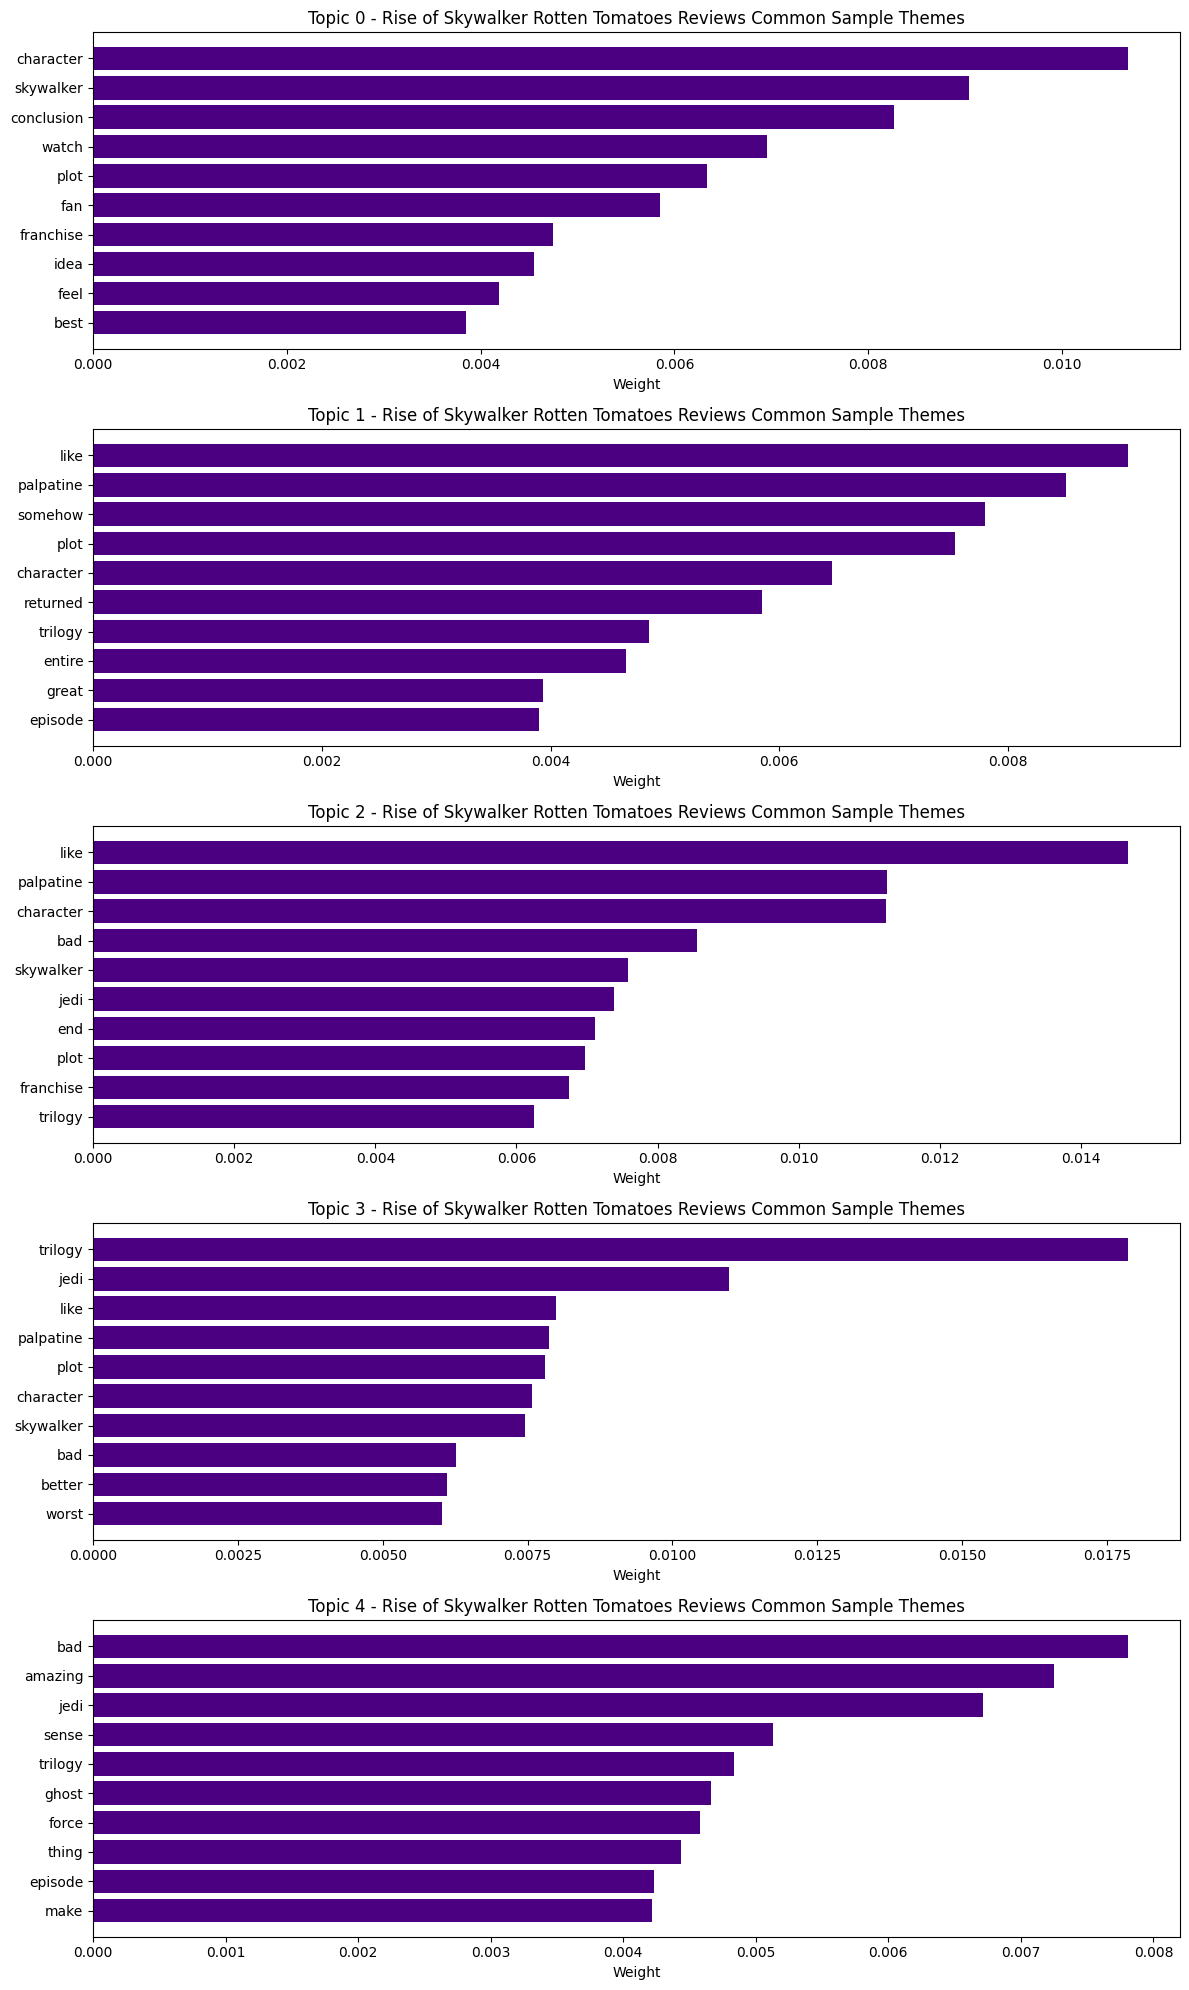

Topic visualizations complete!


In [ ]:
#Extracted from HW4-2
#Visualizing our topics
import matplotlib.pyplot as plt

fig, axes = plt.subplots(num_topics, 1, figsize=(12, 4*num_topics))

if num_topics == 1:
    axes = [axes]

for idx in range(num_topics):
    words_weights = lda_model.show_topic(idx, 10)
    words = [word for word, weight in words_weights]
    weights = [weight for word, weight in words_weights]

    axes[idx].barh(range(len(words)), weights, color='indigo')
    axes[idx].set_yticks(range(len(words)))
    axes[idx].set_yticklabels(words)
    axes[idx].set_xlabel('Weight')
    axes[idx].set_title(f'Topic {idx} - Rise of Skywalker Rotten Tomatoes Reviews Common Sample Themes')
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()

print("Topic visualizations complete!")

---

## Validating Topic Assignments

In [ ]:
#Extracted from HW4-2
#Get dominant topic for each document
def get_document_topics(lda_model, corpus):
    """
    Get dominant topic assignment for each document
    """
    topic_assignments = []

    for doc in corpus:
        topic_dist = lda_model.get_document_topics(doc)
        if topic_dist:  # Check if not empty
            dominant_topic = max(topic_dist, key=lambda x: x[1])
            topic_assignments.append({
                'topic_num': dominant_topic[0],
                'topic_prob': round(dominant_topic[1], 3)
            })
        else:
            topic_assignments.append({
                'topic_num': -1,
                'topic_prob': 0.0
            })

    return topic_assignments

# Get topic assignments
topic_info = get_document_topics(lda_model, corpus)
df['dominant_topic'] = [t['topic_num'] for t in topic_info]
df['topic_probability'] = [t['topic_prob'] for t in topic_info]

print("Topic assignments complete!")
print(f"\nTopic distribution across documents:")
print(df['dominant_topic'].value_counts().sort_index())

#Added 11/10/25-TJ

Topic assignments complete!

Topic distribution across documents:
dominant_topic
0     76
1     56
2    190
3    188
4     50
Name: count, dtype: int64


In [ ]:
#Extracted from HW4-2
#Sample documents from each topic for validation
print("🔍 DOCUMENT-TOPIC VALIDATION CHECK")
print("=" * 70)
print("For each topic, read sample documents and assess if the assignment makes sense:\n")

for topic_num in range(num_topics):
    print(f"\n📌 TOPIC {topic_num}")
    print("=" * 50)

    # Get top words for this topic
    topic_words = lda_model.show_topic(topic_num, 8)
    word_list = [word for word, prob in topic_words]
    print(f"Keywords: {', '.join(word_list)}")

    # Get sample documents from this topic
    topic_docs = df[df['dominant_topic'] == topic_num]

    if len(topic_docs) == 0:
        print("No documents assigned to this topic.")
        continue

    print(f"\nDocuments in this topic: {len(topic_docs)}")
    print(f"\nSample documents (read and assess if topic assignment makes sense):\n")

    for i, (idx, row) in enumerate(topic_docs.head(3).iterrows(), 1):
        print(f"  {i}. {row[text_column][:150]}...")
        print(f"     Probability: {row['topic_probability']:.3f}")
        print()

#Added 11/10/25-TJ

🔍 DOCUMENT-TOPIC VALIDATION CHECK
For each topic, read sample documents and assess if the assignment makes sense:


📌 TOPIC 0
Keywords: character, skywalker, conclusion, watch, plot, fan, franchise, idea

Documents in this topic: 76

Sample documents (read and assess if topic assignment makes sense):

  1. Was it needed to have gag writters in every single scene?? This is not scifi, its fantasy, they rode horses on a starship. So many holes in this movie...
     Probability: 0.989

  2. It is, simply put, the most disappointed I have ever been by a movie....
     Probability: 0.949

  3. Aaaaaah! La trama sembra scritta da un bambino che ha appena visto la trilogia originale e dice: "mettiamo tipo di nuovo Palpatine, un sacco di incroc...
     Probability: 0.994


📌 TOPIC 1
Keywords: like, palpatine, somehow, plot, character, returned, trilogy, entire

Documents in this topic: 56

Sample documents (read and assess if topic assignment makes sense):

  1. ⭐️⭐️⭐️⭐️ (4/5)

Loved it! The Ri

---

## Integration Across All Three Methods

In [ ]:
#Extracted from HW4-2
#Analyze sentiment patterns within each topic
print("📊 SENTIMENT BY TOPIC ANALYSIS")
print("=" * 50)

for topic_num in range(num_topics):
    topic_docs = df[df['dominant_topic'] == topic_num]

    if len(topic_docs) == 0:
        continue

    avg_sentiment = topic_docs['sentiment_score'].mean()

    # Get topic keywords
    topic_words = lda_model.show_topic(topic_num, 5)
    word_list = [word for word, prob in topic_words]

    print(f"\nTopic {topic_num}: {', '.join(word_list)}")
    print(f"  Documents: {len(topic_docs)}")
    print(f"  Average sentiment: {avg_sentiment:.3f}")
    print(f"  Sentiment range: {topic_docs['sentiment_score'].min():.3f} to {topic_docs['sentiment_score'].max():.3f}")

📊 SENTIMENT BY TOPIC ANALYSIS

Topic 0: character, skywalker, conclusion, watch, plot
  Documents: 76
  Average sentiment: -0.039
  Sentiment range: -0.976 to 0.980

Topic 1: like, palpatine, somehow, plot, character
  Documents: 56
  Average sentiment: 0.075
  Sentiment range: -0.984 to 0.984

Topic 2: like, palpatine, character, bad, skywalker
  Documents: 190
  Average sentiment: -0.104
  Sentiment range: -0.993 to 0.994

Topic 3: trilogy, jedi, like, palpatine, plot
  Documents: 188
  Average sentiment: -0.262
  Sentiment range: -0.997 to 0.994

Topic 4: bad, amazing, jedi, sense, trilogy
  Documents: 50
  Average sentiment: -0.203
  Sentiment range: -0.993 to 0.994


/tmp/ipython-input-3167477060.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(topic_sentiment_data, labels=[f'Topic {i}' for i in range(num_topics)])


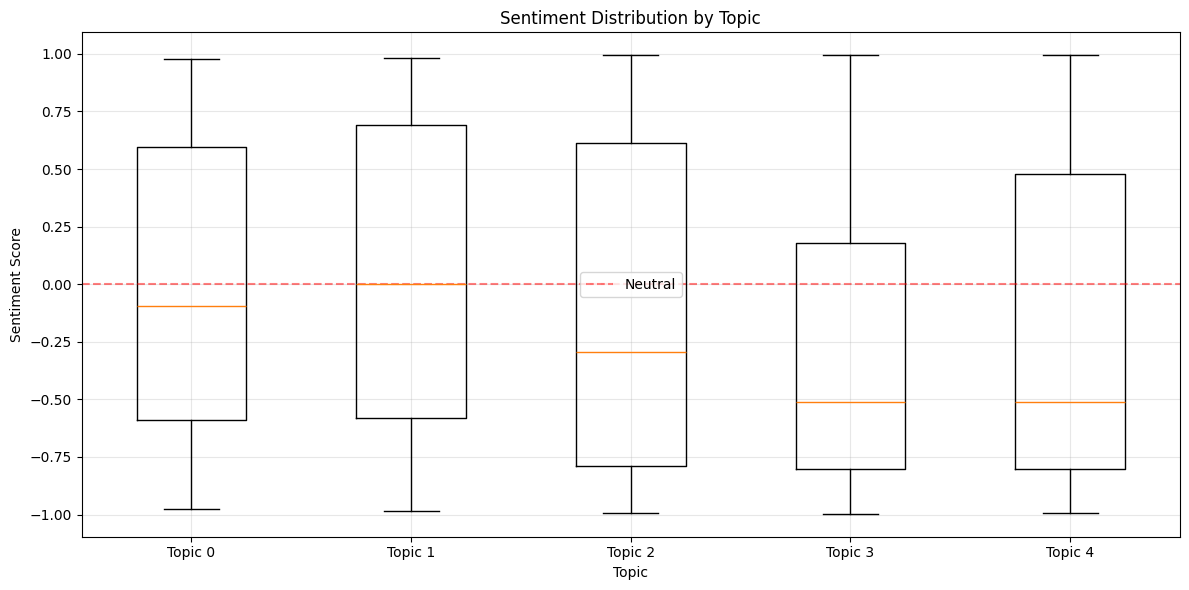

📊 Sentiment by topic visualization complete!


In [ ]:
#Extracted from HW4-2
#Visualize sentiment distribution by topic
fig, ax = plt.subplots(figsize=(12, 6))

# Create box plot of sentiment scores by topic
topic_sentiment_data = [df[df['dominant_topic'] == i]['sentiment_score'].values
                        for i in range(num_topics)]

ax.boxplot(topic_sentiment_data, labels=[f'Topic {i}' for i in range(num_topics)])
ax.set_xlabel('Topic')
ax.set_ylabel('Sentiment Score')
ax.set_title('Sentiment Distribution by Topic')
ax.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Neutral')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Sentiment by topic visualization complete!")

In [ ]:
#Extracted from HW4-2
#Create comprehensive summary
print("📋 COMPLETE ANALYTICAL SUMMARY")
print("=" * 60)
print(f"\nDataset: {len(df)} documents")
print(f"\n1️⃣ TERM FREQUENCY (from HW4-1):")
print(f"   Vocabulary size: {len(dictionary)} unique words")
print(f"   [Your top words from HW4-1]")

print(f"\n2️⃣ SENTIMENT ANALYSIS (from HW4-1):")
print(f"   Average sentiment: {df['sentiment_score'].mean():.3f}")
print(f"   Positive: {len(df[df['sentiment_score'] > 0.1])} ({len(df[df['sentiment_score'] > 0.1])/len(df)*100:.1f}%)")
print(f"   Neutral: {len(df[(df['sentiment_score'] >= -0.1) & (df['sentiment_score'] <= 0.1)])} ({len(df[(df['sentiment_score'] >= -0.1) & (df['sentiment_score'] <= 0.1)])/len(df)*100:.1f}%)")
print(f"   Negative: {len(df[df['sentiment_score'] < -0.1])} ({len(df[df['sentiment_score'] < -0.1])/len(df)*100:.1f}%)")

print(f"\n3️⃣ TOPIC MODELING (HW4-2):")
print(f"   Number of topics: {num_topics}")
for topic_num in range(num_topics):
    topic_docs = df[df['dominant_topic'] == topic_num]
    if len(topic_docs) > 0:
        topic_words = lda_model.show_topic(topic_num, 3)
        word_list = [word for word, prob in topic_words]
        print(f"   Topic {topic_num} ({len(topic_docs)} docs, avg sentiment {topic_docs['sentiment_score'].mean():.2f}): {', '.join(word_list)}")

📋 COMPLETE ANALYTICAL SUMMARY

Dataset: 560 documents

1️⃣ TERM FREQUENCY (from HW4-1):
   Vocabulary size: 3622 unique words
   [Your top words from HW4-1]

2️⃣ SENTIMENT ANALYSIS (from HW4-1):
   Average sentiment: -0.139
   Positive: 200 (35.7%)
   Neutral: 52 (9.3%)
   Negative: 308 (55.0%)

3️⃣ TOPIC MODELING (HW4-2):
   Number of topics: 5
   Topic 0 (76 docs, avg sentiment -0.04): character, skywalker, conclusion
   Topic 1 (56 docs, avg sentiment 0.07): like, palpatine, somehow
   Topic 2 (190 docs, avg sentiment -0.10): like, palpatine, character
   Topic 3 (188 docs, avg sentiment -0.26): trilogy, jedi, like
   Topic 4 (50 docs, avg sentiment -0.20): bad, amazing, jedi


In [ ]:
#Extracted from HW4-2
#Save CHECKPOINT for CURRENT DS2 Analysis Code Dataset!
output_filename = 'Goon Squad_integrated_data_set2.csv'  # Replace LASTNAME
df.to_csv(output_filename, index=False)

print(f"✅ Integrated dataset saved as: {output_filename}")
print(f"\nFinal dataset summary:")
print(f"- Total entries: {len(df)}")
print(f"- Columns: {df.columns.tolist()}")
print(f"- Number of topics: {num_topics}")
print(f"- Average sentiment: {df['sentiment_score'].mean():.3f}")

✅ Integrated dataset saved as: Goon Squad_integrated_data_set2.csv

Final dataset summary:
- Total entries: 560
- Columns: ['review-data href', 'audience-reviews__name', 'audience-reviews__name href', 'audience-reviews__duration', 'weapons_reviews', 'clean_text_sentiment', 'words', 'meaningful_words', 'sentiment_score', 'processed_for_topics', 'dominant_topic', 'topic_probability']
- Number of topics: 5
- Average sentiment: -0.139
